<a href="https://colab.research.google.com/github/suchismita-priya/corona-virus-tweet-sentiment-analysis/blob/main/Corona_virus_tweet_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Suchismita Priyadarsinee

# **Project Summary -**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

Location

Tweet At

Original Tweet

Label

# **GitHub Link -**

https://github.com/suchismita-priya/corona-virus-tweet-sentiment-analysis

# **Problem Statement**


This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:

Location

Tweet At

Original Tweet

Label

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import chi2_contingency

! pip install contractions
import contractions
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
!pip install neattext
import neattext.functions as nfx

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.7 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Provide the file path to your CSV file
file_path = '/content/drive/MyDrive/Coronavirus Tweets.csv'

# Read the CSV file with the specified encoding
df = pd.read_csv(file_path, encoding='latin')


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_col_count = df.shape

In [6]:
print('row count : ', row_col_count[0])
print('column count : ', row_col_count[1])

row count :  41157
column count :  6


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [8]:

# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [9]:


# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

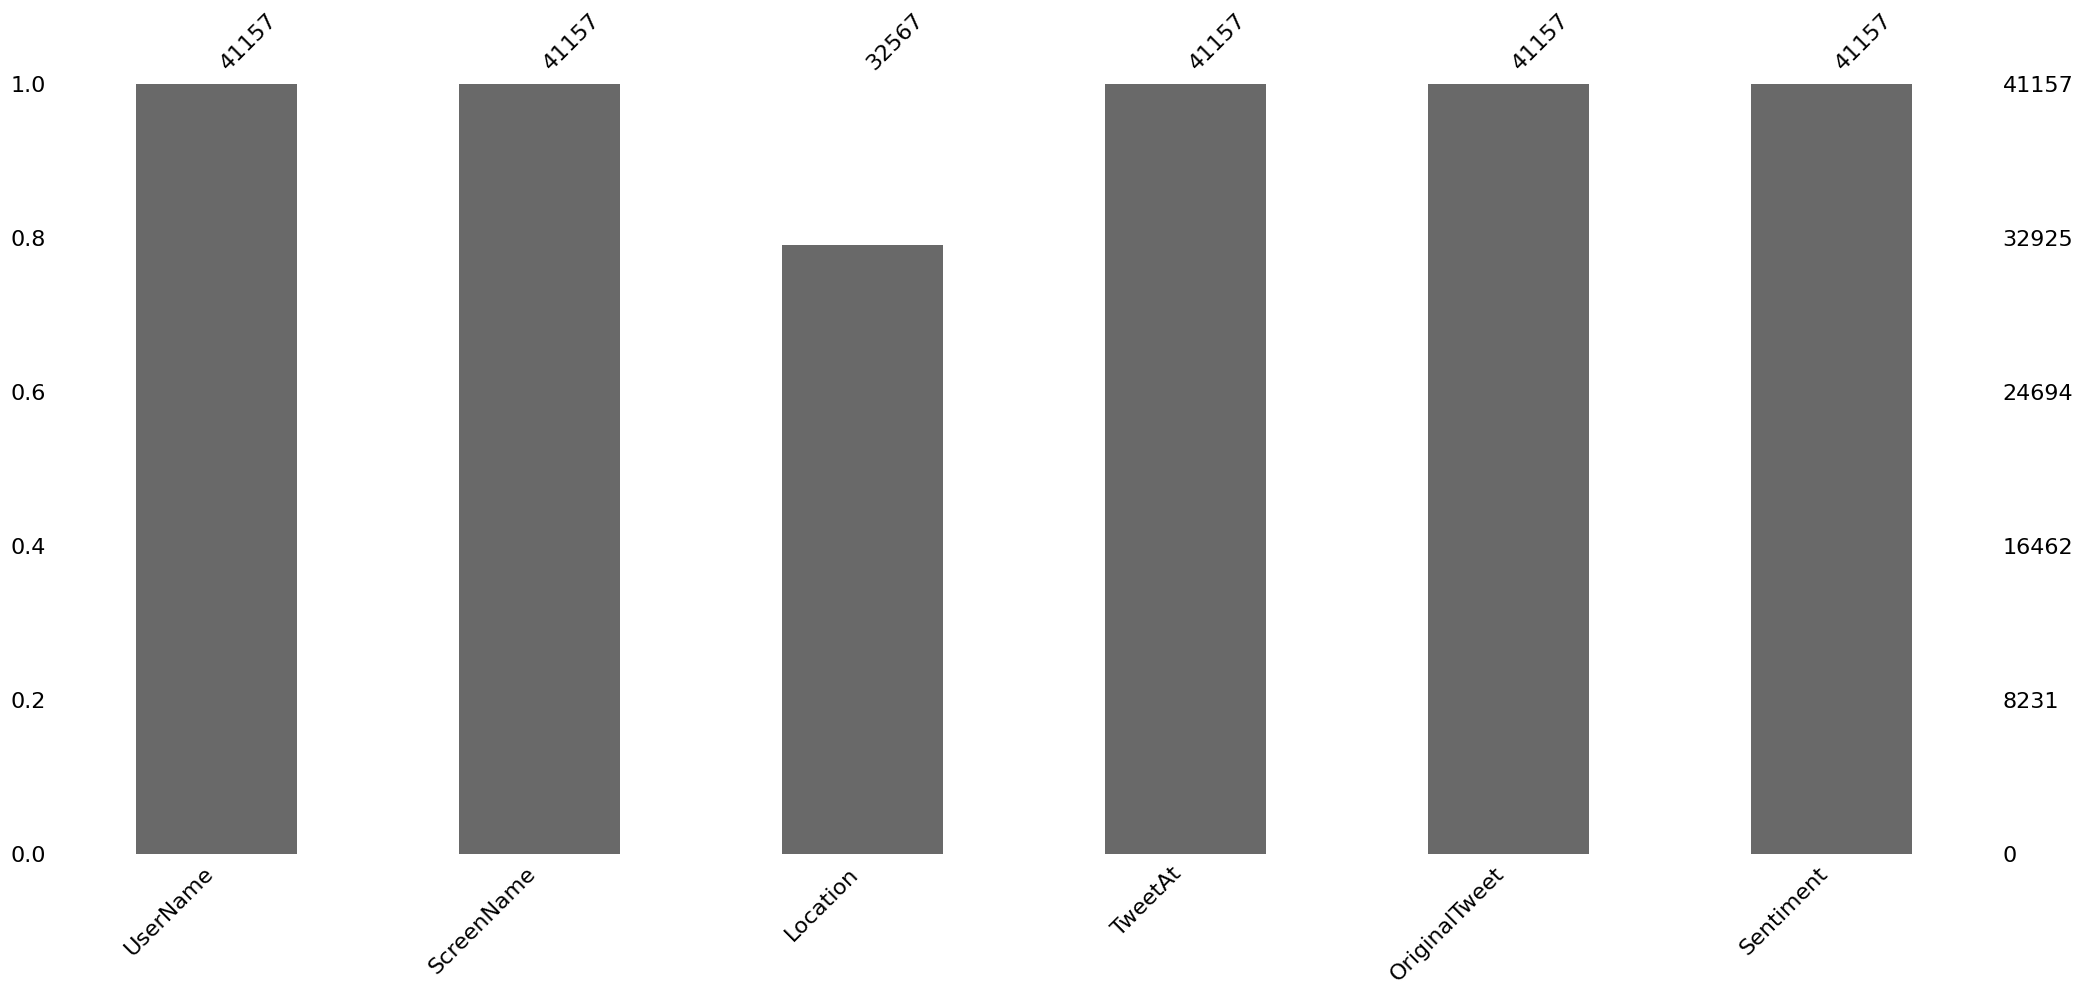

In [10]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

Location column has missing values and no other column has any missing values.


### What did you know about your dataset?

In this Dataset their are 6 column having 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet','Sentiment' and 'Location' column have duplicated value i.e 8590 which can take action later on as proceed on our Classfication Machine Learning Project.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description

**UserName**: This column contains the username of the person who posted the tweet.

**ScreenName**: This column contains the screen name or handle of the user who posted the tweet.

**Location**: This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

**TweetAt**: This column contains the date and time when the tweet was posted.

**OriginalTweet**: This column contains the actual text of the tweet that was posted.

**Sentiment**: This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df['TweetAt'].dtype

dtype('O')

In [15]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

In [16]:
print(f"unique years {df['TweetAt'].dt.year.unique()}")
print(f"unique month {sorted(df['TweetAt'].dt.month.unique())}")
print(f"unique day {sorted(df['TweetAt'].dt.day.unique())}")
print(f"unique day {df['TweetAt'].dt.day_name().unique()}")

unique years [2020]
unique month [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
unique day [4, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
unique day ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


In [17]:
df['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

### What all manipulations have you done and insights you found?

Location column has missing values and no other column has any missing values.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

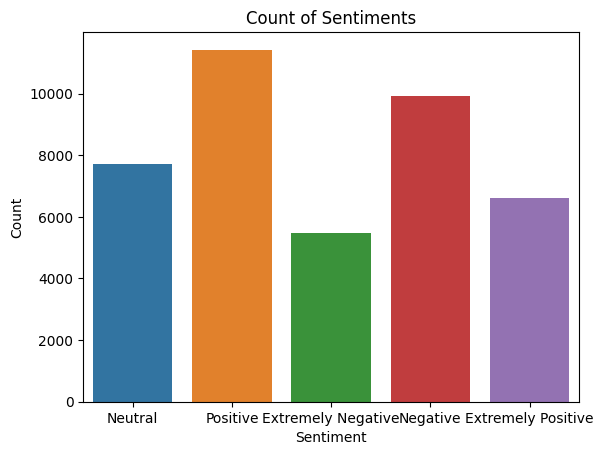

In [18]:
# Chart - 1 visualization code
sns.countplot(data=df, x='Sentiment')
plt.title('Count of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart used in the code is a countplot, which is essentially a bar chart that represents the counts of unique values in a categorical variable. In this case, it's used to visualize the distribution of different sentiments in the dataset.

Countplots are a suitable choice for visualizing the distribution of categorical variables, such as sentiment labels in this context, because they provide a clear and concise representation of how many instances belong to each category. This visualization is helpful when you want to understand the balance or distribution of sentiment labels in your dataset.

##### 2. What is/are the insight(s) found from the chart?

- Most tweets are positive, followed by negative and neutral.
- Least number of tweets are extremely negative.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

# *Most tweets express positive sentiment, followed by negative and neutral:*

**Positive Impact:** The prevalence of positive sentiment in tweets related to the coronavirus indicates that the majority of people may hold a positive outlook or hope, possibly reflecting positive developments such as vaccine news, recoveries, or community support during the pandemic.

**Business Action:** Organizations can leverage this positive sentiment to promote public health measures, support initiatives, or share positive stories to maintain a hopeful outlook. This can encourage public cooperation with health guidelines.


# *Least number of tweets express extremely negative sentiment:*

**Positive Impact:** A smaller number of extremely negative tweets suggests that, in general, there may not be widespread panic or despair regarding the coronavirus. It could indicate that the situation is relatively under control or that people are not experiencing extreme negativity.

**Business Action:** Organizations can continue to provide accurate information, support resources, and safety measures. By addressing concerns and maintaining transparency, they can help prevent extreme negativity.
In the context of the coronavirus, the insights gained from sentiment analysis can be valuable for public health authorities, organizations, and businesses. These insights can help them tailor their messaging, resources, and support to ensure that the public remains informed and maintains a balanced perspective on the situation.

#### Chart - 2

In [19]:
# Chart - 2 visualization code
# Looking into the count value of different Location
df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [20]:
# Looking for the unique values in the variable
df.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

<Axes: >

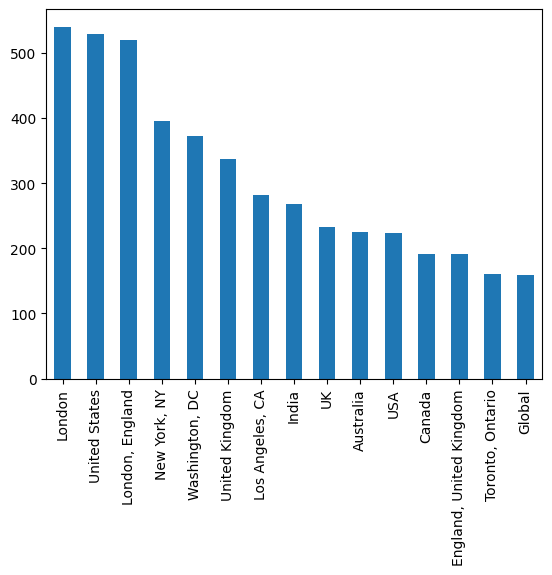

In [21]:
df['Location'].value_counts()[0:15].plot(kind='bar')

##### 1. Why did you pick the specific chart?

Bar charts make it easy to compare different categories or groups of data. You can quickly see which category has the highest or lowest value. bar charts are a versatile and widely used tool for data visualization, particularly when dealing with categorical or discrete data.

They provide a clear visual representation of data, making it easier to draw insights and make informed decisions.

##### 2. What is/are the insight(s) found from the chart?

Most of the tweets are from UK(London) , USA(New york, Washington dc,Los angeles) and India.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above count plot shows the top 15 locations in the dataset.

Plot shows the London to be the maximum among all the different locations.

Second place is of United States and India ranks at 8th place.

#### Chart - 3

In [22]:
# Chart - 3 visualization code
# Count value of TweetAt (Tweeting date)
df['TweetAt'].value_counts()

2020-03-20    3448
2020-03-19    3215
2020-03-25    2979
2020-03-18    2742
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-17    1977
2020-08-04    1881
2020-07-04    1843
2020-06-04    1742
2020-03-24    1480
2020-09-04    1471
2020-04-13    1428
2020-03-26    1277
2020-05-04    1131
2020-10-04    1005
2020-02-04     954
2020-11-04     909
2020-03-04     810
2020-12-04     803
2020-04-04     767
2020-03-16     656
2020-01-04     630
2020-03-27     345
2020-03-31     316
2020-04-14     284
2020-03-29     125
2020-03-30      87
2020-03-28      23
Name: TweetAt, dtype: int64

In [23]:
df.TweetAt.unique()

array(['2020-03-16T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-03-18T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', '2020-03-23T00:00:00.000000000',
       '2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-03-29T00:00:00.000000000',
       '2020-03-30T00:00:00.000000000', '2020-03-31T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-04-04T00:00:00.000000000',
       '2020-05-04T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-07-04T00:00:00.000000000', '2020-08-04T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-10-04T00:00:00.000000000',
       '2020-11-04T00:00:00.000000000', '2020-12-04

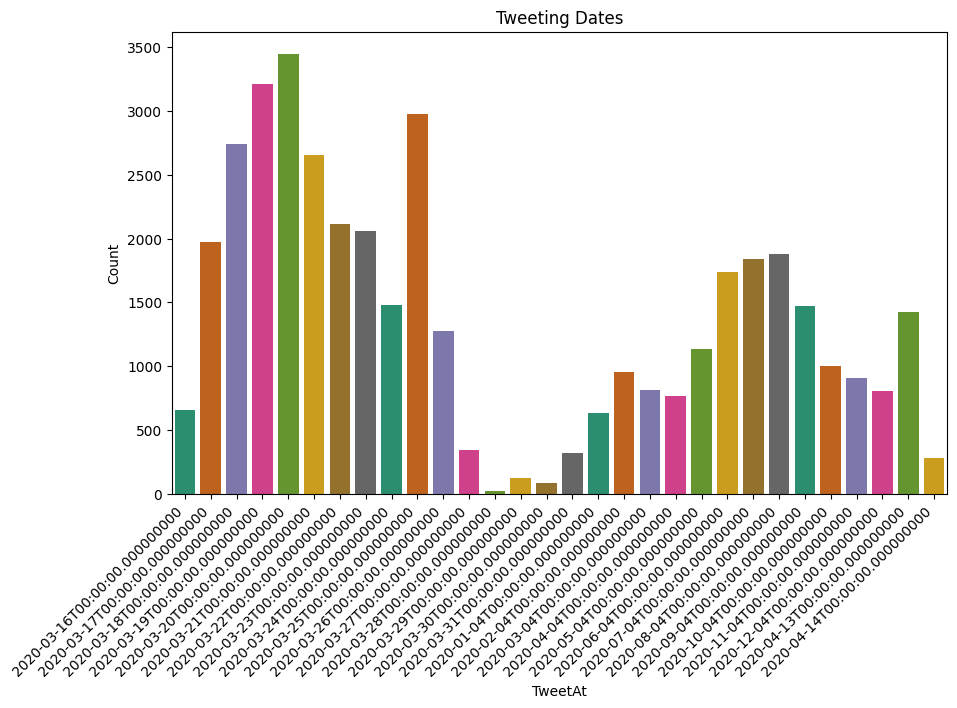

In [24]:
# Distribution of Dates of Tweets
plt.figure(figsize=(10,6))
sns.countplot(x='TweetAt', data=df, palette ='Dark2')
plt.title("Tweeting Dates")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Count")
plt.xlabel("TweetAt")
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

##### 2. What is/are the insight(s) found from the chart?

- The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from the mid-month of March 2020 to mid-month of April 2020.

- From the we can find out that the date 20-03-2020 has the maximum count value among all the other occuring dates.

- Least count value is for date 28-03-2020.

- The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.. **Peak on 20-03-2020:**

**Positive Impact:** The peak in tweet activity on this specific date could be due to a significant event, announcement, or discussion related to the coronavirus. Businesses that are actively monitoring and engaging with the public on such dates may have the opportunity to reach a larger audience.

**Business Action:** Organizations can use this insight to identify critical dates and tailor their communication or marketing efforts around them.

2.. **Least Activity on 28-03-2020:**

**Neutral Impact:** The lower tweet activity on this date might not indicate a negative impact directly. It could be a day with lower news or events related to the coronavirus.

**Business Action:** Organizations can plan their social media and communication strategies, considering the fluctuation in public engagement.


3.. **Tweeting Date Range: 16-03-2020 to 14-04-2020:**

**Neutral Impact:** The continuous tweeting activity over approximately 30 days signifies a sustained interest or discussion about the topic.                     
**Business Action:** Organizations can maintain their presence and keep the public informed during extended periods of discussion.

#### Chart - 4

In [25]:
# Chart - 4 visualization code
df['text_length'] = df['OriginalTweet'].apply(len)

In [26]:
tweet_character_length=df['text_length'].sort_values(ascending=False)

In [27]:
tweet_character_length

25160    355
7483     350
29688    341
17811    340
27346    338
        ... 
15577     12
16872     11
35526     11
20467     11
9776      11
Name: text_length, Length: 41157, dtype: int64

In [28]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

In [29]:
top_tweet_character_length

,Original_Tweet_Row,tweet_character_Count
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


In [30]:
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)

<Axes: xlabel='Original_Tweet_Row', ylabel='tweet_character_Count'>

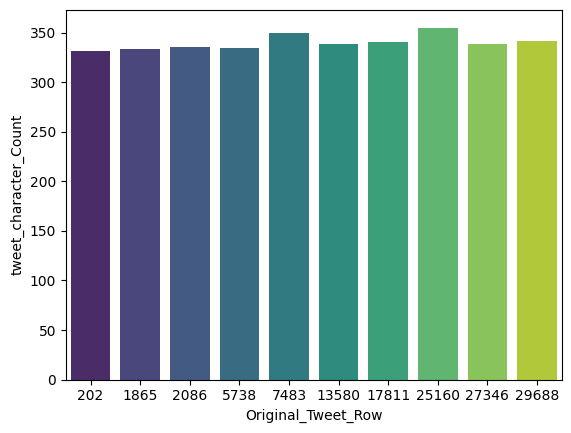

In [31]:
sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')

##### 1. Why did you pick the specific chart?

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the tweet_character_Count.

##### 2. What is/are the insight(s) found from the chart?

Row Number 25160 has highest Tweet length of character i.e 350

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Potential Insights:**

**High Engagement or Elaboration:** A tweet with a longer character count might indicate that the user is providing more detailed information, explanations, or comments. This could be a positive sign, as it might suggest higher engagement with the topic or content.

**Negative Growth or Challenges:** On the flip side, a tweet with an exceptionally long character count might also indicate a negative scenario, such as a complex issue, a complaint, or a crisis. Lengthy tweets are sometimes used to express frustration or dissatisfaction.

**Business Actions:**

**Positive Engagement:** Businesses can monitor tweets with longer character counts for positive engagement. If users are elaborating on their positive experiences or expressing a deep interest in a product or service, this could be leveraged for marketing and building a positive brand image.

**Negative Issues and Crisis Management:** On the other hand, if the longer tweets are related to negative experiences or problems, it's crucial for businesses to identify and address these concerns promptly. Negative tweets can impact the brand's reputation, so addressing issues and resolving complaints can mitigate negative consequences.

#### Chart - 5

In [32]:
# Chart - 5 visualization code
# Tweet Count For Each Sentiment
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Number of "Positive" sentiments are higher than all other sentiments

In [33]:
# replace values
replace_values = {'Sentiment':{'Extremely Positive':'Positive','Extremely Negative':'Negative'}}
df=df.replace(replace_values)

In [34]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


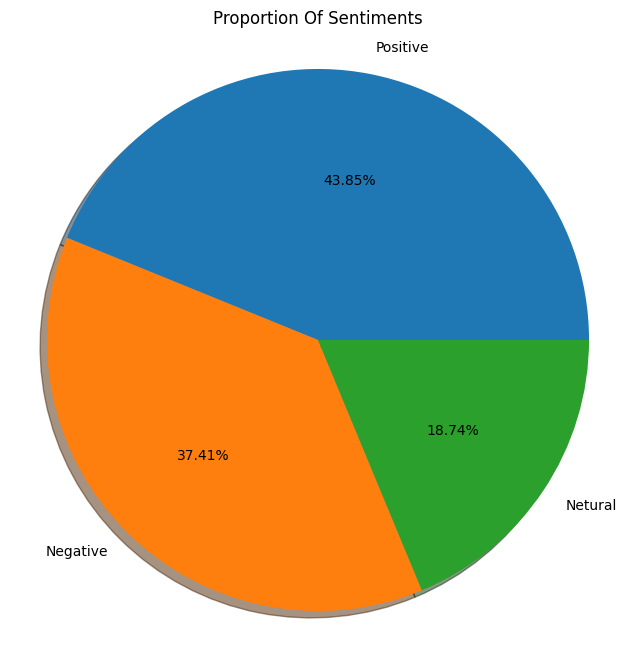

In [35]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments")
plt.show()

##### 1. Why did you pick the specific chart?

 It is chosen for visualizing the distribution of sentiments (positive, negative, and neutral) because of its ability to effectively convey the proportion or composition of different categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Simplification: Combining "Extremely Positive" and "Extremely Negative" sentiments into their respective broader categories simplifies the sentiment analysis process. It reduces the number of sentiment categories, making it easier to categorize and analyze sentiment.

More Balanced Distributions: The Pie-Plot observation that the total number of "Positive" sentiments is still high after combining suggests that the dataset might have had an imbalanced distribution of extremely positive and extremely negative sentiments. By combining them with their broader categories, the sentiment distribution may become more balanced, which can lead to more reliable sentiment analysis results.

User Experience: From a business perspective, this simplification might lead to a more straightforward user experience when presenting sentiment analysis results. It's often easier to explain and act upon positive and negative sentiments rather than distinguishing between extreme and non-extreme sentiments.

**Negative Business Impact:**

Loss of Fine-Grained Analysis: Combining "Extremely Positive" and "Extremely Negative" sentiments into broader categories results in a loss of granularity. This means that the analysis might miss nuances present in the extreme sentiments. For some businesses, understanding the subtleties in sentiment can be crucial for decision-making.

Potentially Biased Insights: The decision to combine sentiments should be made carefully. If the dataset originally had a significant number of extremely positive or extremely negative sentiments, merging them into broader categories may lead to biased or oversimplified insights.

#### Chart - 6

In [36]:
# Chart - 6 visualization code
df['month'] = df['TweetAt'].dt.month
df['day'] = df['TweetAt'].dt.day
df['day_name'] = df['TweetAt'].dt.day_name()

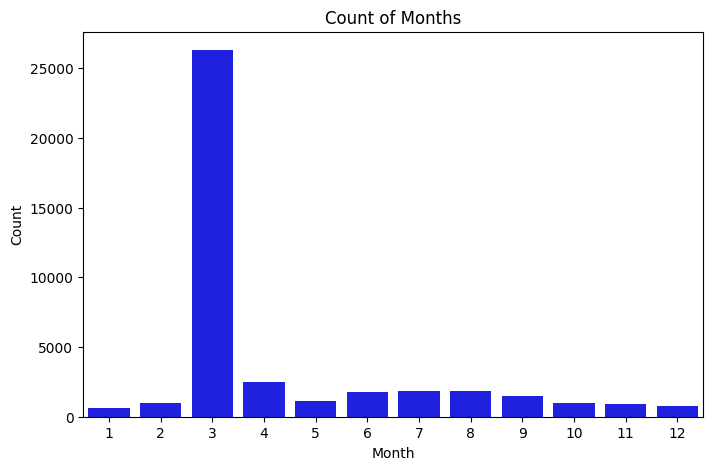

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='month', color='blue')
plt.title('Count of Months')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

##### 1. Why did you pick the specific chart?

This displays the distribution of tweet counts across different months.

##### 2. What is/are the insight(s) found from the chart?

- Most tweets are from March.
- Corona varius was decleared pandamic in March.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Implications:

Public Engagement: The fact that most tweets are from March suggests a high level of public engagement during that period. This could be an indicator of people actively discussing and sharing information about the pandemic.

Awareness and Information Sharing: March was a critical time for disseminating information about COVID-19. The high tweet activity during this month could indicate that people were using social media platforms to share important information, guidelines, and updates related to the pandemic. This can be seen as a positive sign of public awareness and information sharing.


Negative Implications:

Pandemic Severity: On the negative side, the high tweet activity in March might also indicate the severity of the pandemic during that time. A surge in tweets could imply that the situation was escalating, which could be a cause for concern.

Negative Sentiments: The high tweet activity could also include negative sentiments, such as fear, anxiety, or anger. A large number of tweets about a pandemic can be indicative of public distress.

#### Chart - 7

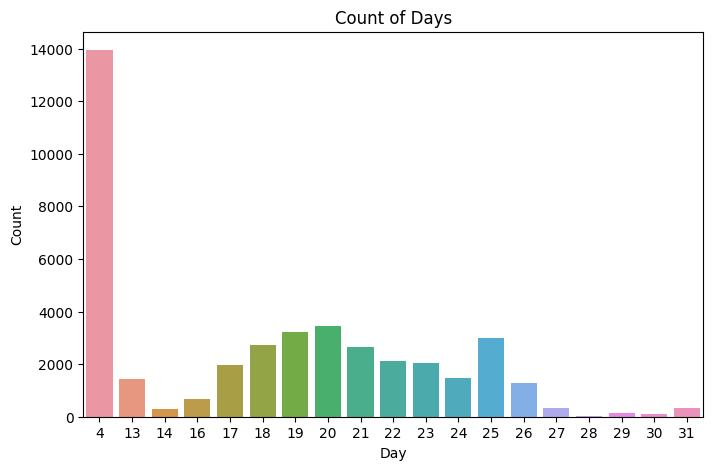

In [38]:
# Chart - 7 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='day')
plt.title('Count of Days')
plt.xlabel('Day')
plt.ylabel('Count')

plt.show()

##### 1. Why did you pick the specific chart?

This displays the distribution of tweet counts across different days.

##### 2. What is/are the insight(s) found from the chart?

- from chart it is clear on first week specifically on 4th march the cases were high.
- It got decresed but again showed up during mid month during 16th march to 25th march.
- after that cases were very less could be 10% or 5%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Healthcare and Pharmaceutical Industries: For businesses in the healthcare and pharmaceutical sectors, fluctuations in COVID-19 cases can drive demand for medical supplies, medications, and healthcare services. High case counts might lead to increased demand for testing, treatment, and preventive measures. These industries could potentially benefit from the observed fluctuations.

Delivery Services and Online Retail: During periods of high cases or lockdowns, people may increase their reliance on online shopping and delivery services. Businesses in e-commerce and delivery might see higher demand during these times.


**Negative Business Impact:**

Brick-and-Mortar Retail: Physical retailers, especially those in non-essential categories, might see negative impacts during lockdowns or when cases are high. Reduced foot traffic and consumer reluctance to visit stores could lead to decreased sales.

Hospitality and Travel: Industries like hospitality and travel are often negatively affected during periods of high COVID-19 cases or lockdowns. People may cancel travel plans and avoid hotels and restaurants, resulting in reduced revenue.

Event and Entertainment: Businesses involved in organizing events, concerts, and entertainment might face challenges during periods of high cases. Cancellations or reduced attendance at events could have negative financial consequences.

Manufacturing and Supply Chains: Global supply chains can be disrupted by lockdowns, quarantine measures, and reduced workforce availability. Manufacturing businesses may face challenges in sourcing materials and fulfilling orders.

#### Chart - 8

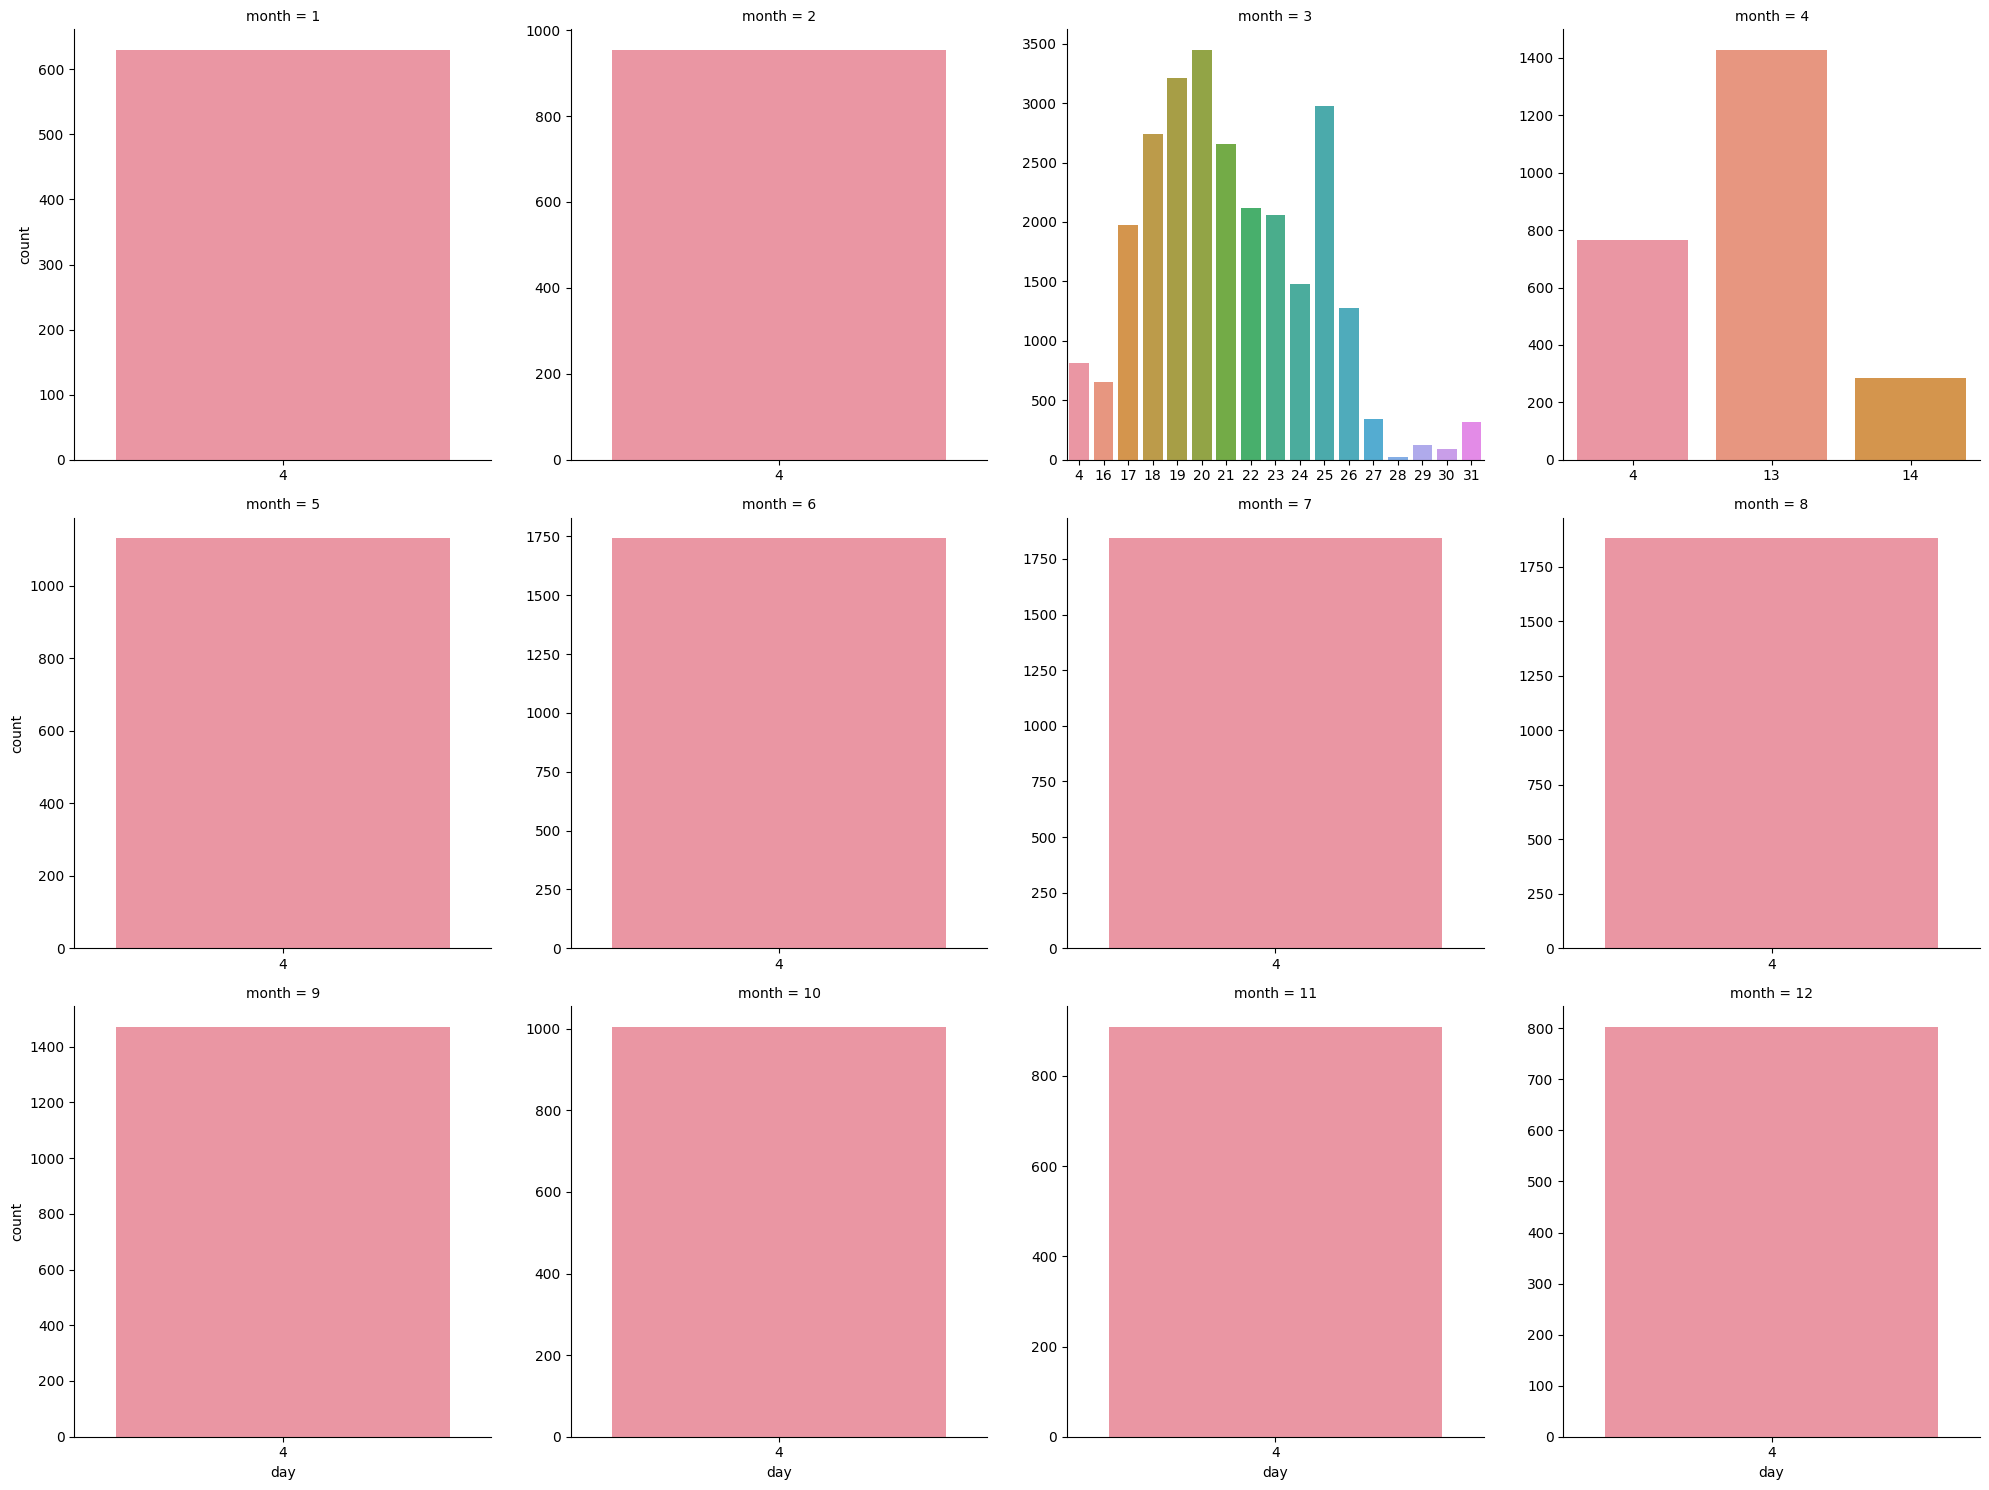

In [39]:
# Chart - 8 visualization code
sns.catplot(x= 'day', data=df, col='month',kind='count',col_wrap=4,sharey=False,sharex=False);

##### 1. Why did you pick the specific chart?

The choice of using a catplot in this specific scenario appears to be motivated by the need to visualize the count of tweets over different days of the week, across different months.

##### 2. What is/are the insight(s) found from the chart?

- Only in march tweets are there are most number of tweets from 4th to 31st, with 20th being the day when most number of tweets occured.
- april had tweets from 4th,13th and 14th while most number of tweets occured on 13th.
- All other months have tweets only from 4th of the repective month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

March Surge: The observation that there's a surge in tweets in March, particularly from the 4th to the 31st, with the highest tweet count on the 20th, could be indicative of a significant public interest or engagement during that time. If a business or organization was actively involved in providing relevant information, services, or products related to the context of the tweets (e.g., COVID-19 information, products, or services), this could have been a valuable period for engagement and outreach.

April Activity: While April had fewer tweets than March, there's still some activity observed from the 4th, 13th, and 14th, with a peak on the 13th. For businesses that can adapt and provide timely responses, this might have represented an opportunity to continue engagement.


**Negative Growth:**

Limited Data in Other Months: In contrast, the insight that all other months have tweets starting from the 4th of the respective month and relatively low tweet counts could indicate limited activity during those times. For a business that depends on social media engagement or online activity, these periods might represent times of reduced public interaction.

#### Chart - 9

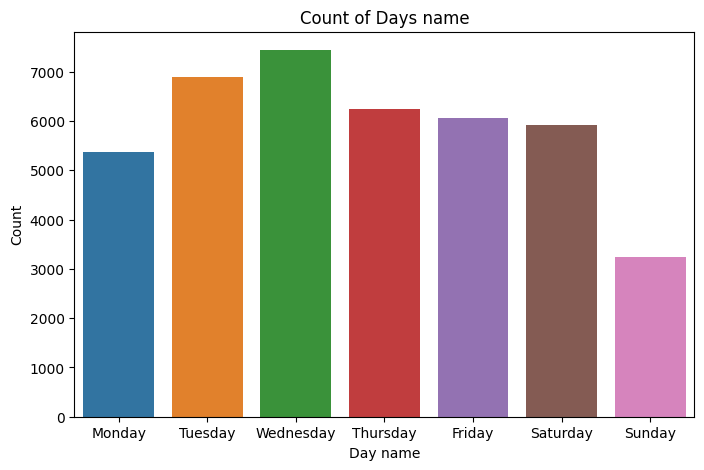

In [40]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='day_name')
plt.title('Count of Days name')
plt.xlabel('Day name')
plt.ylabel('Count')

plt.show()

##### 1. Why did you pick the specific chart?

Showing chart according to days.

##### 2. What is/are the insight(s) found from the chart?

Most tweets happended during wednesday and least during sunday



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Wednesday Engagement: The observation that most tweets occurred on Wednesdays could be indicative of higher social media activity during the middle of the workweek. For businesses or organizations actively involved in social media marketing or outreach, this could present an opportunity to engage with a larger audience. Businesses that adapt their strategies to focus on Wednesdays might see increased reach and engagement during those periods.

Other Active Days: It's also worth noting that other weekdays may have relatively high tweet activity. If a business has the capacity to maintain a consistent social media presence during these days, it could lead to more opportunities for customer engagement and communication.

**Negative Growth:**

Sunday Inactivity: The insight that there are fewer tweets on Sundays could indicate lower online engagement during weekends, especially Sundays. For businesses that depend heavily on weekend engagement, this might represent a less active period.

Consistency Challenges: If a business is unable to maintain a consistent online presence on the days with higher tweet activity (e.g., Wednesdays), it might miss out on potential engagement opportunities.

#### Chart - 10

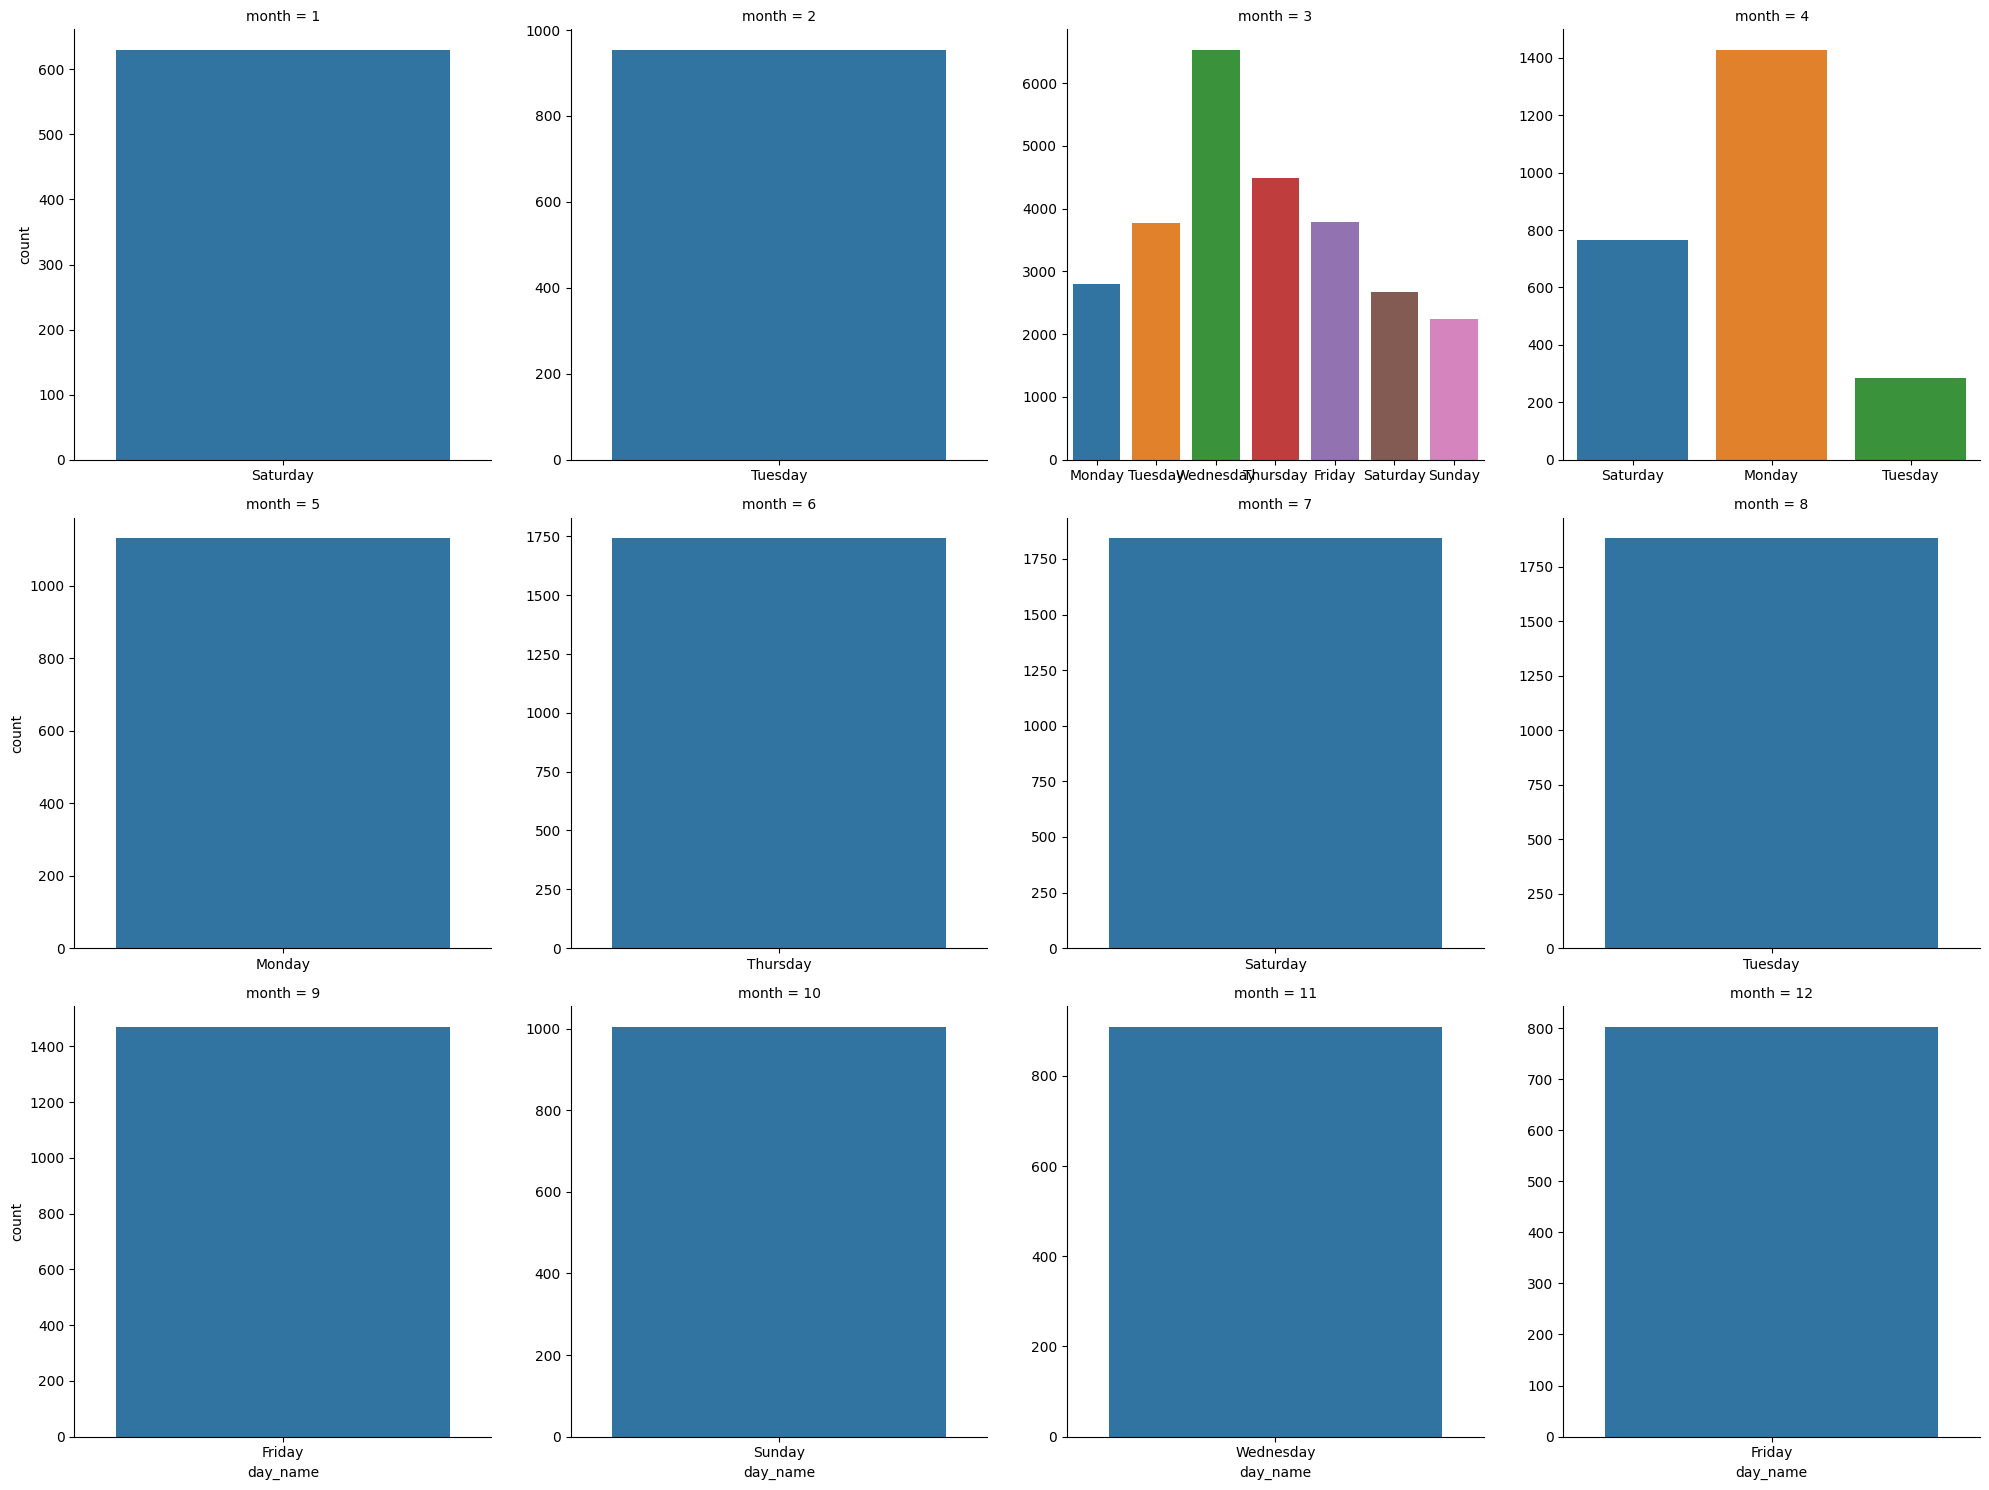

In [41]:
# Chart - 10 visualization code
sns.catplot(x= 'day_name', data=df, col='month',kind='count',col_wrap=4,sharey=False,sharex=False)

##### 1. Why did you pick the specific chart?

catplot with days of the week on the x-axis and counts of tweets on the y-axis, organized by month, is an effective choice for visualizing tweet patterns

##### 2. What is/are the insight(s) found from the chart?

On march and april month patterns are showing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Tweet Patterns in March:

Increasing Activity: Tweet activity appears to increase as the month progresses, with the highest number of tweets occurring around the 20th of March. This might correspond to a significant event or announcement related to the coronavirus, leading to heightened social media discussions.
Business Impact:

Awareness and Engagement: If your business is involved in healthcare, public health, or any sector directly impacted by the coronavirus, this increased awareness and engagement could be an opportunity to share information or promote relevant products or services.

#### Chart - 11

<Axes: xlabel='Sentiment', ylabel='month'>

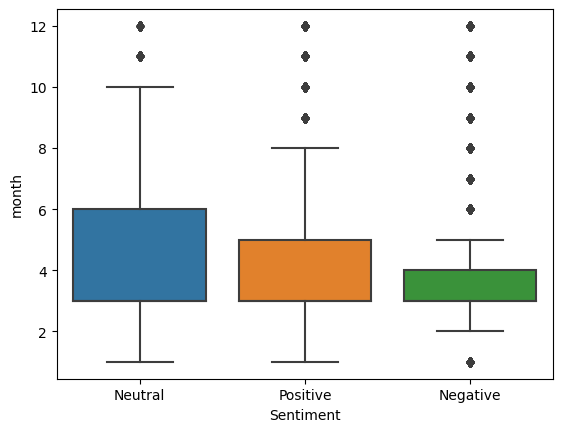

In [42]:
# Chart - 11 visualization code
sns.boxplot(data=df, y='month',x='Sentiment')

##### 1. Why did you pick the specific chart?

boxplot to visualize the distribution of sentiments across different months in the dataset provides several benefits:

Comparison of Sentiments: A boxplot effectively displays the distribution of sentiment scores (positive, negative, neutral) across different months, making it easy to compare how sentiments vary over time.

Outlier Detection: Boxplots can identify potential outliers within each sentiment category for each month. Outliers could represent extreme sentiment scores that might require specific attention in further analysis.

##### 2. What is/are the insight(s) found from the chart?

- showing more outliers in negative tweets.
- positive sentiments are showing less outliers than negative.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Monitoring and Managing Negative Sentiments: The higher number of outliers in negative tweets may indicate a stronger emotional response from users. Businesses should closely monitor and address negative sentiments as they can quickly escalate and damage a company's reputation. Promptly addressing these negative sentiments can mitigate the impact on the brand.

Opportunity for Positive Engagement: With fewer outliers in positive sentiments, there may be a less critical need for immediate responses. However, it's an opportunity for businesses to engage with their satisfied customers and potentially turn them into brand advocates. Acknowledging and appreciating positive feedback can strengthen customer loyalty and word-of-mouth marketing.

Risk Assessment: The presence of outliers, especially in negative sentiments, can be an early warning sign of potential issues. Businesses can use sentiment analysis to identify and assess risks, allowing them to proactively address customer concerns or improve their products and services.

Improving Customer Service: Identifying and addressing outliers in sentiment can help businesses improve their customer service. If certain products or services consistently receive negative feedback, it's an opportunity to make necessary improvements and enhance the customer experience.

Marketing Strategy: Understanding the sentiment distribution and outliers can inform marketing strategies. Businesses can tailor their campaigns to target specific sentiment groups, addressing concerns or emphasizing positive aspects of their offerings.

Competitor Analysis: Analyzing sentiment outliers in comparison to competitors can provide insights into market positioning. Identifying areas where a business excels or falls behind competitors can guide strategic decisions.

#### Chart - 12

<Axes: xlabel='Sentiment', ylabel='month'>

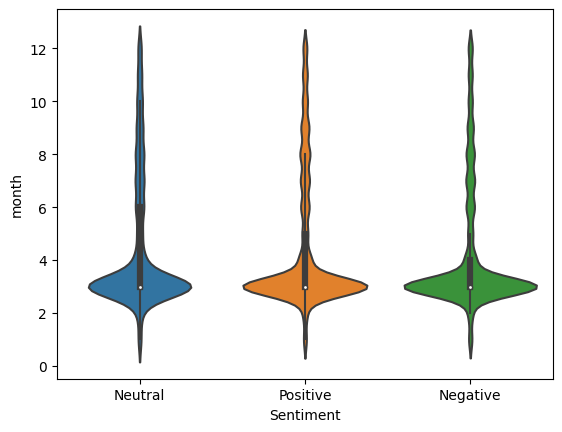

In [43]:
# Chart - 12 visualization code
sns.violinplot(data=df, y='month',x='Sentiment')

##### 1. Why did you pick the specific chart?

A violin plot is used when you want to visualize the distribution of a numerical variable across different categories or groups. In this case, the plot is showing the distribution of sentiment scores across different months.

##### 2. What is/are the insight(s) found from the chart?

As like above same outliers are showing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

like boxplot these are also providing same business impact.

#### Chart - 13

In [44]:
num_vars = list(df.select_dtypes(exclude=['object']))
num_vars

['UserName', 'ScreenName', 'TweetAt', 'text_length', 'month', 'day']

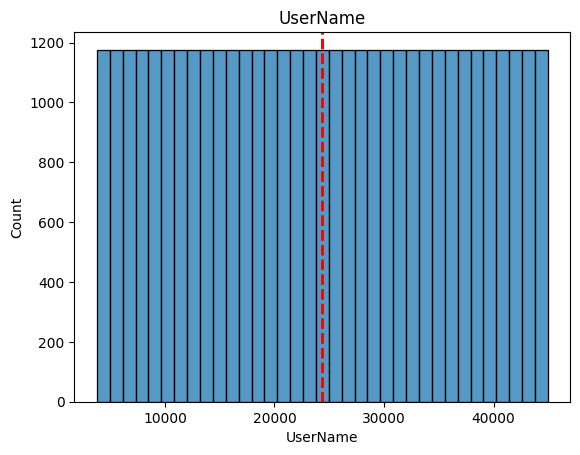

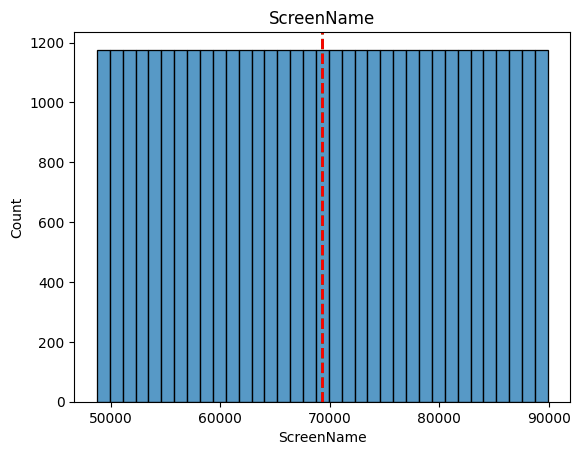

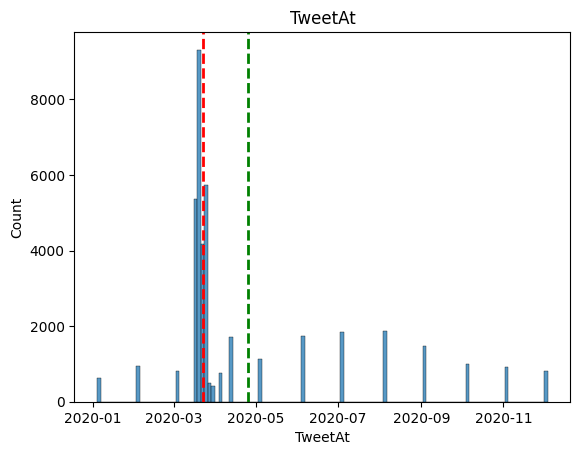

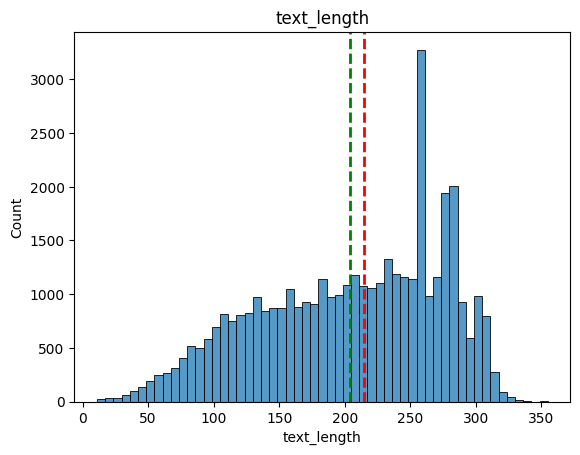

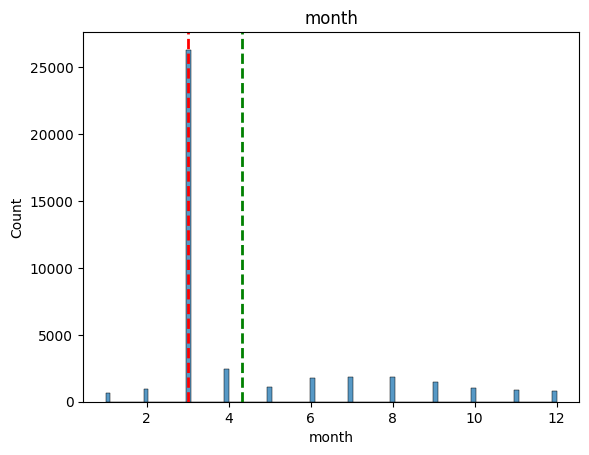

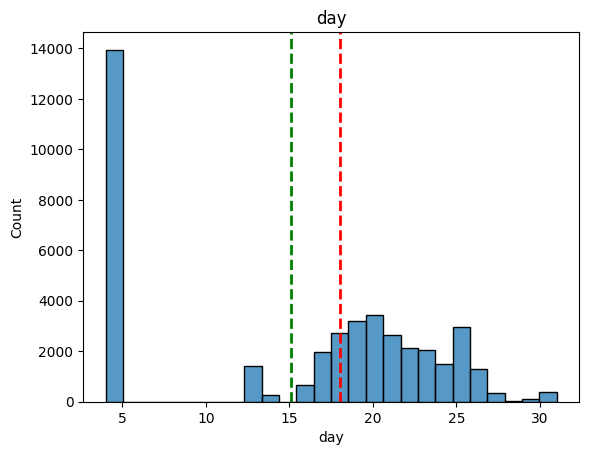

In [45]:
# Chart - 13 visualization code
for i in num_vars:
  sns.histplot(x = df[i])
  plt.axvline(df[i].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='red', linestyle='dashed', linewidth=2)
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

it is creating histogram plots for numerical variables in your dataset and overlaying vertical lines for the mean (in green) and the median (in red) of each variable. This is a common approach for visualizing the distribution and central tendency of numerical data.

##### 2. What is/are the insight(s) found from the chart?

Central Tendency: The vertical green line represents the mean, while the red line represents the median. Comparing these lines can help you assess the central tendency of the data. If the mean and median are close, it suggests a symmetric distribution. If they differ significantly, it might indicate the presence of outliers.

Skewness: The shape of the histogram can reveal the presence of skewness. A long tail to the right (positive skew) or left (negative skew) indicates an asymmetric distribution.

Outliers: Histograms can help identify potential outliers. Outliers are data points that deviate significantly from the majority of the data. They are often located in the tails of the distribution.

- textlength ,month,day is having symmetric distribution while others are not.
- positive skewed are day,month,tweet at.
- negetive skewed are textlength.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Insights:

Symmetric Distributions: Variables like text_length, month, and day showing symmetric distributions are generally easier to work with in statistical analyses. This symmetry can simplify modeling and analysis.
Negative Insights:

Positive Skewness: Variables like day, month, and tweet_at exhibit positive skewness. This suggests that these variables are concentrated on the lower side of their respective ranges. In a business context, this could imply that certain days, months, or times are associated with lower activity or fewer tweets. Understanding why these periods have lower engagement or activity could be important for a business.

Negative Skewness: The text_length variable displays negative skewness. In this case, most tweets have longer text lengths, but there are some tweets with exceptionally short text. Negative skewness might indicate that the majority of tweets contain more information. Understanding this could be valuable for content strategy.

#### Chart - 14 - Correlation Heatmap

<Axes: >

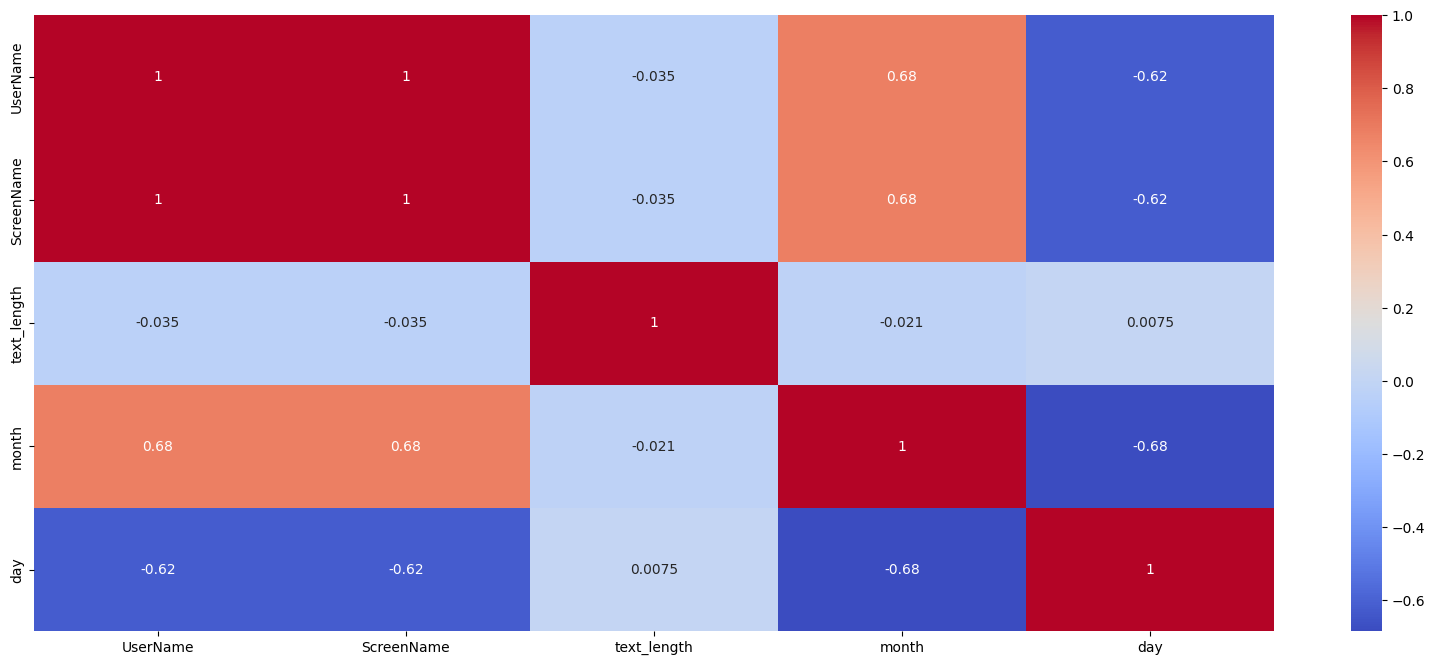

In [46]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

It is particularly useful for visualizing complex datasets, especially when you want to explore relationships between variables or patterns within the data. Heatmaps are excellent for visualizing relationships or correlations between variables in a dataset. By assigning colors to different values, you can quickly identify which variables are positively or negatively correlated.

##### 2. What is/are the insight(s) found from the chart?

- username,screenname are positively corelated with each other.

#### Chart - 15 - Pair Plot

<Figure size 3000x2500 with 0 Axes>

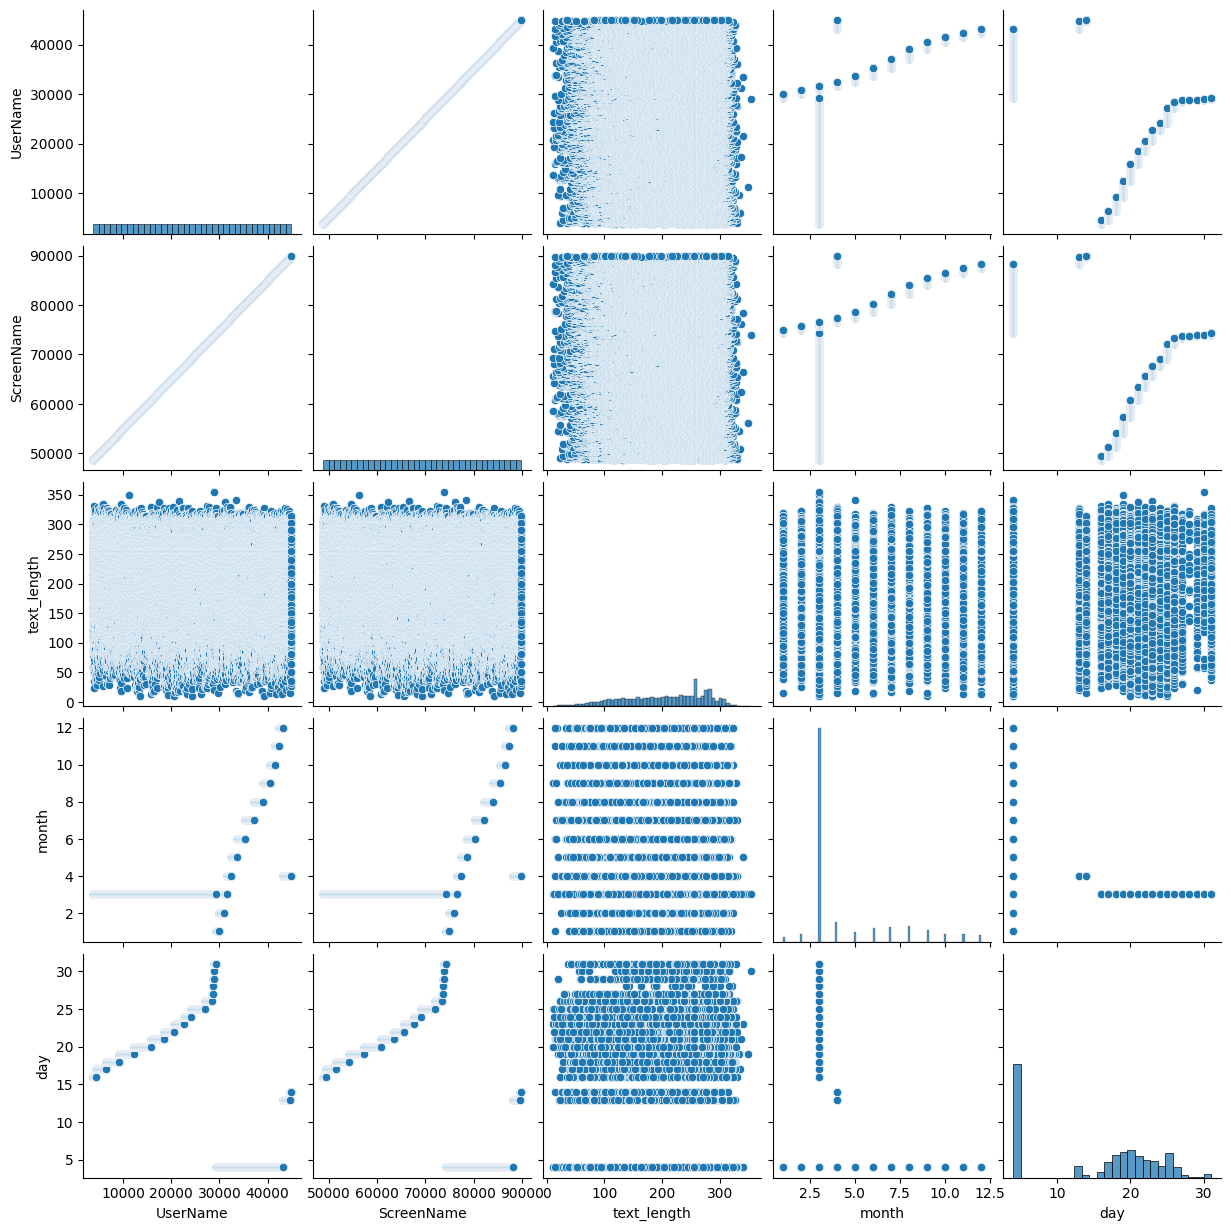

<Figure size 3000x2500 with 0 Axes>

In [47]:
# Pair Plot visualization code
sns.pairplot(df)
plt.figure(figsize=(30,25))

##### 1. Why did you pick the specific chart?


pairplot is a type of data visualization that is particularly useful when dealing with datasets that contain multiple numerical features (variables). It provides a grid of scatterplots for each pair of numerical variables in your dataset, allowing you to visualize the relationships and correlations between them.

##### 2. What is/are the insight(s) found from the chart?

username & screenname are highly corelated to each other, so in future at time of model training we'll use only one .

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1:
Null Hypothesis (H0): The average sentiment score for tweets about coronavirus is equal among different months.
Alternative Hypothesis (H1): The average sentiment score for tweets about coronavirus is not equal among different months.

Hypothesis 2:
Null Hypothesis (H0): The sentiment of tweets about coronavirus is the same for different countries.
Alternative Hypothesis (H1): The sentiment of tweets about coronavirus varies among different countries.

Hypothesis 3:
Null Hypothesis (H0): The sentiment of tweets about coronavirus is the same for tweets posted from different days.
Alternative Hypothesis (H1): The sentiment of tweets about coronavirus differs among tweets posted from different days.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average sentiment score for tweets about coronavirus is equal among different months.

Alternative Hypothesis (H1): The average sentiment score for tweets about coronavirus is not equal among different months.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
# Create a dictionary to map sentiment categories to numerical values
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Apply the mapping to create a new column with numerical sentiment values
df['Sentiment_Num'] = df['Sentiment'].map(sentiment_mapping)

# Group the data by month and get the numerical sentiment scores
groups = [group["Sentiment_Num"] for name, group in df.groupby("month")]
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

# Set your significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences among the months.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences among the months.")

Reject the null hypothesis. There are significant differences among the months.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: One-way Analysis of Variance (ANOVA)

##### Why did you choose the specific statistical test?

The specific statistical test, was chosen because it is appropriate for comparing the means of two groups to determine if they are significantly different from each other.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In this statement, the null hypothesis assumes that there is no significant difference in the sentiment of tweets about coronavirus among different countries.

The alternative hypothesis, on the other hand, suggests that there are significant variations in the sentiment of tweets across different countries. To test this hypothesis, we can use statistical tests or analysis of variance (ANOVA) to examine whether sentiment scores significantly differ among countries.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
# Map sentiment labels to numeric scores
sentiment_scores = {'Positive': 2, 'Neutral': 1, 'Negative': 0}

# Apply the mapping to create a new 'Sentiment_Score' column
df['Sentiment_Score'] = df['Sentiment'].map(sentiment_scores)

# Define a list of locations to compare
locations = ['London','United States','London','England','New York',
             'NY','Washington', 'DC','United Kingdom','Los Angeles', 'CA','India','UK','Australia','USA','Canada','England', 'United Kingdom','Toronto','Ontario','Global']
# Initialize an empty list to store the sentiment scores for each location
sentiment_groups = []

# Loop through the locations and extract sentiment scores
for location in locations:
    sentiment_group = df[df['Location'] == location]['Sentiment_Score']
    sentiment_groups.append(sentiment_group)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*sentiment_groups)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Define the significance level (alpha)
alpha = 0.05

# Check if p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There are significant differences in sentiment among locations.")
else:
    print("Fail to reject the null hypothesis")
    print("There are no significant differences in sentiment among locations.")

F-statistic: 1.1961946920551116
P-value: 0.246507071438596
Fail to reject the null hypothesis
There are no significant differences in sentiment among locations.


##### Which statistical test have you done to obtain P-Value?

I used the one-way Analysis of Variance (ANOVA) test to obtain a p-value. ANOVA is a statistical test used to compare the means of multiple groups to determine whether there are statistically significant differences among those groups.

In the context of the previous discussion, I performed ANOVA to test whether there were statistically significant differences in sentiment scores among different locations. The p-value obtained from ANOVA helps in making a decision about whether there are significant differences or not.

##### Why did you choose the specific statistical test?

I chose the one-way Analysis of Variance (ANOVA) test in this context because it's suitable for comparing the means of multiple groups. The hypothesis we were testing was whether the sentiment of tweets about coronavirus varies among different countries (locations). Since we had more than two groups (different countries), ANOVA was an appropriate choice.

ANOVA evaluates whether there are any statistically significant differences among the group means. If the p-value obtained from ANOVA is less than a chosen significance level (alpha), it suggests that there are significant differences in sentiment among countries. If the p-value is greater than alpha, it suggests there are no significant differences.

In this case, the choice of statistical test is based on the specific research question and the type of data we are analyzing, which involves comparing sentiment scores (a continuous variable) among multiple groups (countries).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The sentiment of tweets about coronavirus is the same for tweets posted from different days.

Alternative Hypothesis (H1): The sentiment of tweets about coronavirus differs among tweets posted from different days.

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value


# Create a contingency table
contingency_table = pd.crosstab(df['Sentiment'], df['day'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared:", chi2)
print("P-value:", p)

# Define the significance level (alpha)
alpha = 0.05

# Check if p-value is less than alpha to determine significance
if p < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between Sentiment and Days.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between Sentiment and Days.")


Chi-squared: 197.7507574987814
P-value: 3.200844752335164e-24
Reject the null hypothesis
There is a significant association between Sentiment and Days.


##### Which statistical test have you done to obtain P-Value?

I have used the Chi-squared test for independence to obtain the p-value in my previous response. This test is used to determine whether there is a significant association between two categorical variables, in this case, the association between "Sentiment" and "Days" in the context of tweets about coronavirus.

The p-value from the Chi-squared test helps assess the significance of this association.

##### Why did you choose the specific statistical test?

I chose the Chi-squared test for independence in this scenario because it is an appropriate statistical test to determine whether there is a significant association between two categorical variables, which is the case when investigating the relationship between "Sentiment" and "Days" in tweets about coronavirus. This test is commonly used for such analyses when working with categorical data.

The null hypothesis (H0) assumes that there is no association between the two variables, while the alternative hypothesis (H1) assumes that there is a significant association.

The Chi-squared test calculates the p-value, which tells us whether the observed associations are likely to have occurred by random chance. If the p-value is less than a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant association between the variables. This test is suitable for assessing whether the sentiment of tweets differs among tweets posted from different devices.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [51]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

UserName              0
ScreenName            0
Location           8590
TweetAt               0
OriginalTweet         0
Sentiment             0
text_length           0
month                 0
day                   0
day_name              0
Sentiment_Num         0
Sentiment_Score       0
dtype: int64

In [52]:
# Replace missing values with the most frequent value
df = df.fillna(df.mode().iloc[0])

In [53]:
df.isnull().sum()

UserName           0
ScreenName         0
Location           0
TweetAt            0
OriginalTweet      0
Sentiment          0
text_length        0
month              0
day                0
day_name           0
Sentiment_Num      0
Sentiment_Score    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Here missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values.

Imputing missing data with mode values can be done with numerical and categorical data.

### 2. Handling Outliers

In [54]:
num_vars

['UserName', 'ScreenName', 'TweetAt', 'text_length', 'month', 'day']

In [55]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length,month,day,day_name,Sentiment_Num,Sentiment_Score
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,16,Monday,1,1
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237,3,16,Monday,2,2
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131,3,16,Monday,2,2
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,306,3,16,Monday,2,2
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,310,3,16,Monday,0,0


In [56]:
df2=df.copy()

In [57]:
df2.drop('TweetAt',axis=1,inplace=True)

In [58]:
num_vars2 = list(df2.select_dtypes(exclude=['object']))
num_vars2

['UserName',
 'ScreenName',
 'text_length',
 'month',
 'day',
 'Sentiment_Num',
 'Sentiment_Score']

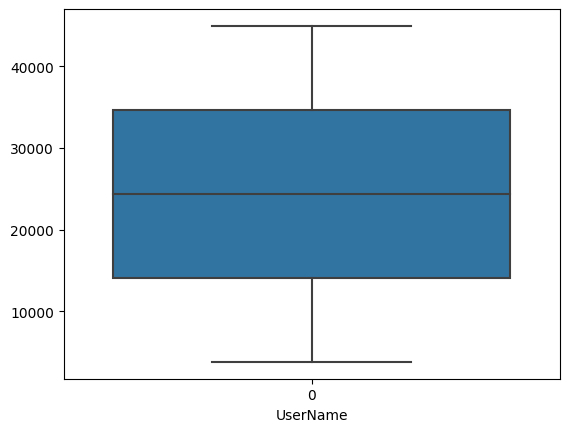

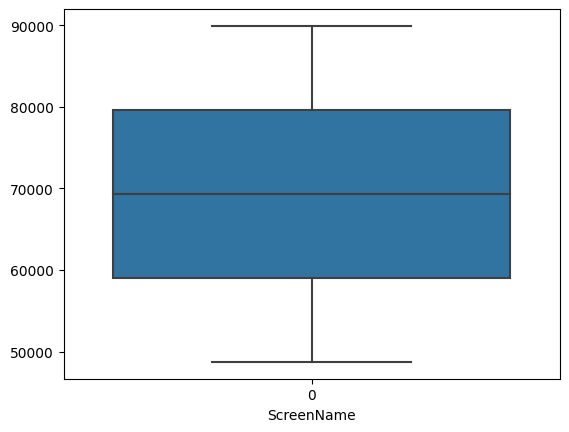

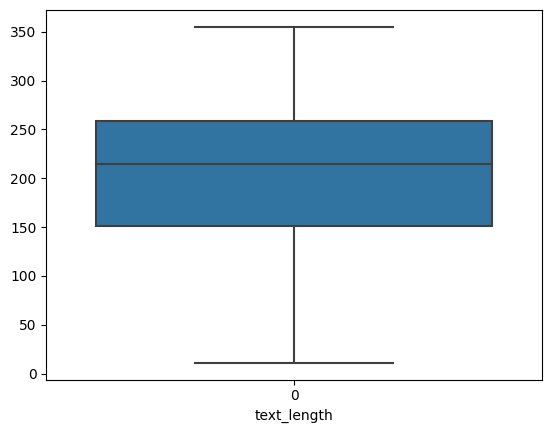

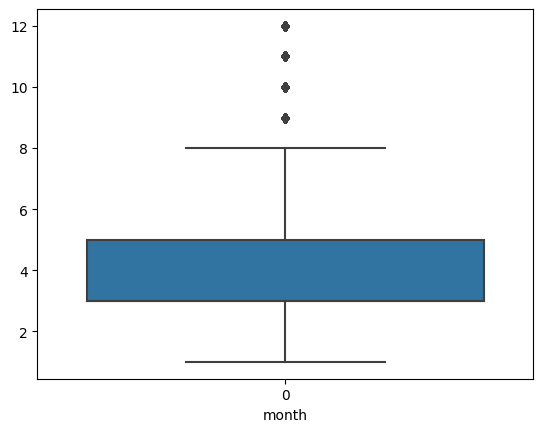

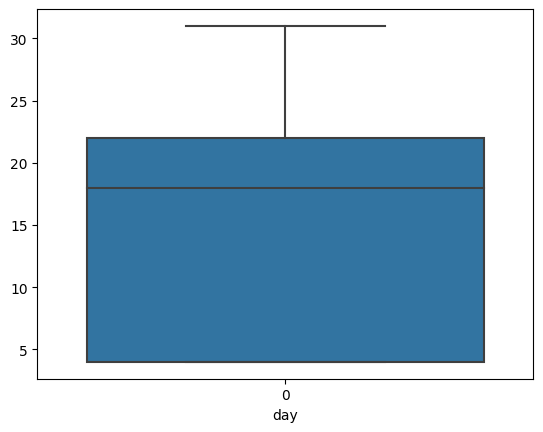

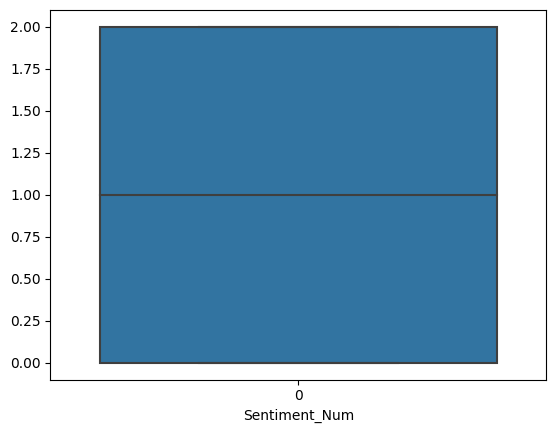

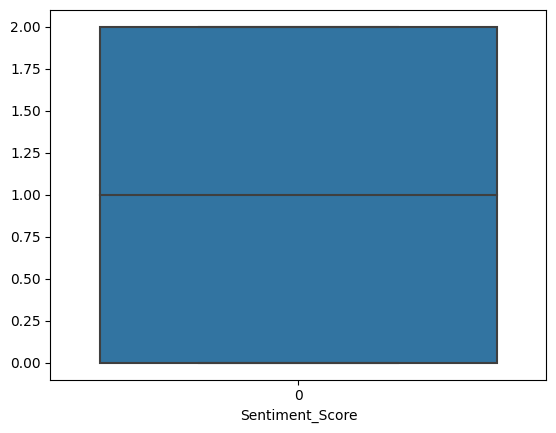

In [59]:
# Handling Outliers & Outlier treatments
for i in num_vars2:
  sns.boxplot(df2[i])
  plt.xlabel(i)
  plt.show()

In [60]:
# Handling Outliers & Outlier treatments
# clipping method
def clip_outliers(df2):
  for i in df2[num_vars2]:
    # using IQR method to define range of upper and lower limit.
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    iqr = q3-q1
    lowerbound = q1-1.5*iqr
    upperbound = q3+1.5*iqr
    # replacing the outliers with upper and lower bound
    df2[i] = df2[i].clip(lowerbound,upperbound)
  return df2

In [61]:
df2 = clip_outliers(df2)

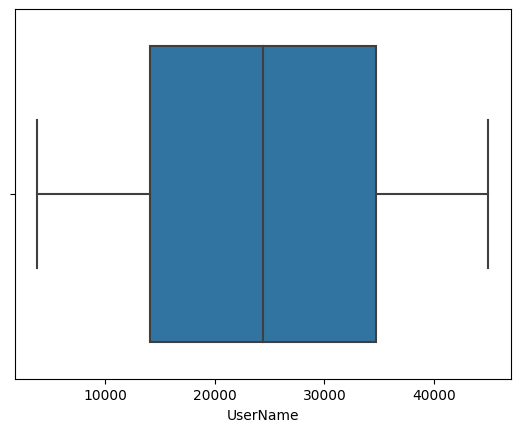

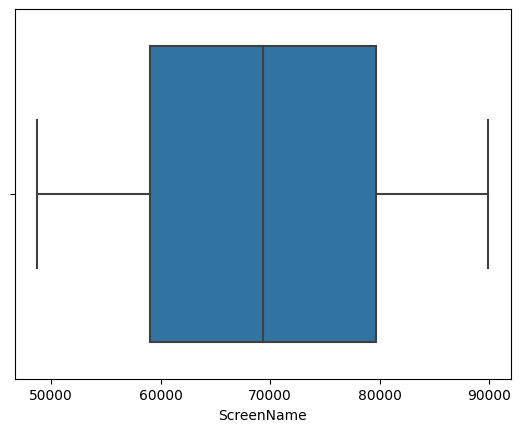

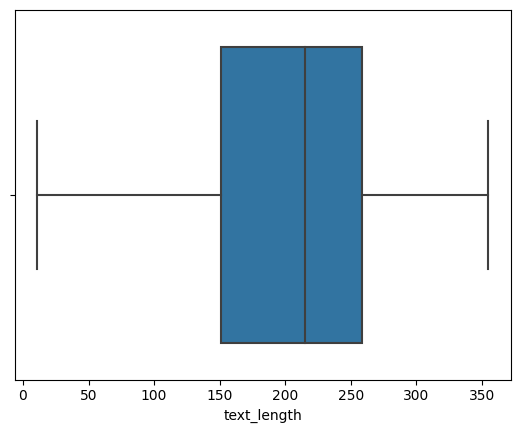

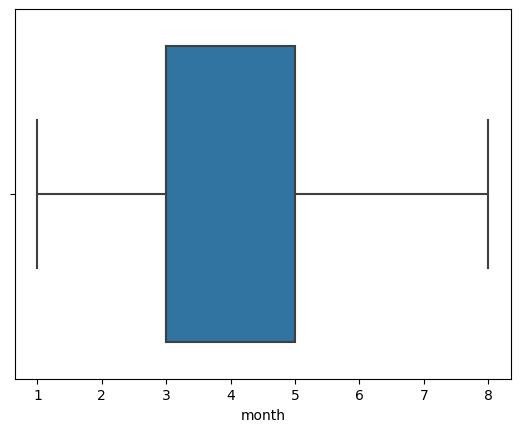

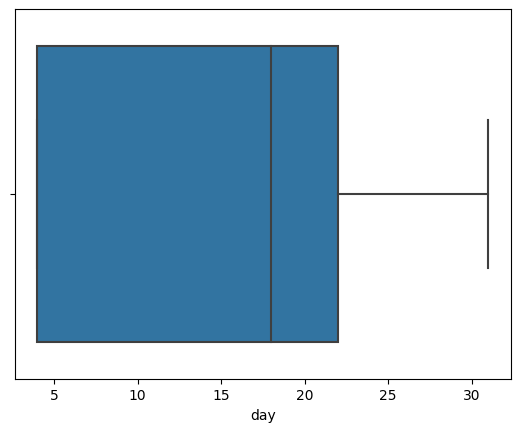

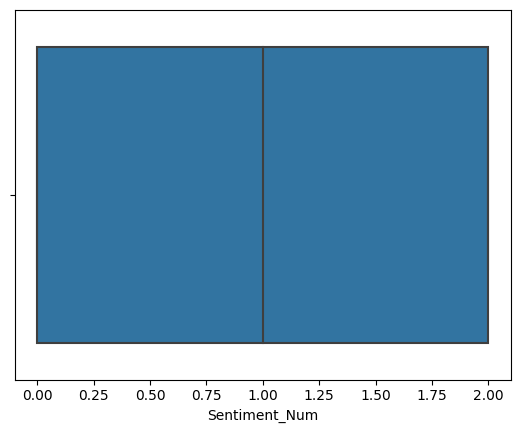

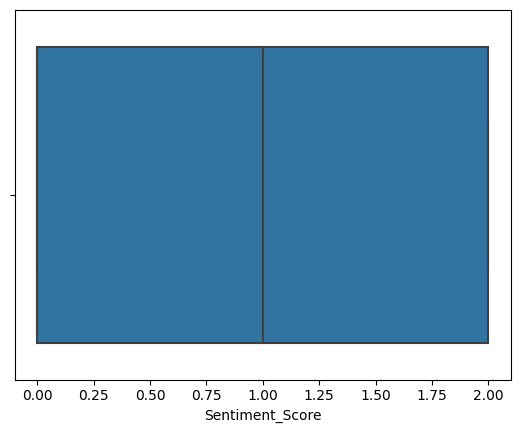

In [62]:
for i in num_vars2:
  sns.boxplot(x=df2[i])
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

### 3. Categorical Encoding

In [63]:
# Encode your categorical columns
category_columns = list(df2.select_dtypes(include=object))
category_columns

['Location', 'OriginalTweet', 'Sentiment', 'day_name']

In [64]:
for i in category_columns:
  print('no of unique values in',i,'is',df2[i].nunique())

no of unique values in Location is 12220
no of unique values in OriginalTweet is 41157
no of unique values in Sentiment is 3
no of unique values in day_name is 7


In [65]:
df2_day = pd.get_dummies(df2["day_name"])

In [66]:
df2 = pd.concat([df2, df2_day], axis=1)

In [67]:
df2.drop('day_name', axis=1, inplace=True)

In [68]:
df2.head(2)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0


**Location and OriginalTweet Columns:** It's not common to perform one-hot encoding on text columns such as 'Location' or 'OriginalTweet'. Instead, text data is typically preprocessed, which may include text cleaning, tokenization, and vectorization using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or Word Embeddings like Word2Vec or GloVe. These techniques convert text data into a numerical format, which can then be used for modeling.

**Sentiment Column:** Since the 'Sentiment' column has only three unique values, we can safely perform one-hot encoding, but as we'll use this in future so we'll keep this as it is.

In [69]:
df2.columns

Index(['UserName', 'ScreenName', 'Location', 'OriginalTweet', 'Sentiment',
       'text_length', 'month', 'day', 'Sentiment_Num', 'Sentiment_Score',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [70]:
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,My food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,"Me, ready to go at supermarket during the #COV...",Negative,310,3,16,0,0,0,1,0,0,0,0,0


In [71]:
df2.shape

(41157, 17)

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding:**
Nominal Categorical Data: One-hot encoding is typically used for nominal categorical data, where there is no intrinsic order among categories. It creates binary columns (0 or 1) for each category, indicating the presence or absence of that category for each data point.

**No Assumption of Order:** One-hot encoding doesn't assume any ordinal relationship between categories. It treats each category as a separate and independent feature.

**Algorithm Compatibility**: Some machine learning algorithms, especially those based on distance or magnitude (e.g., k-means clustering), work better with one-hot encoded categorical features. These algorithms might misinterpret label-encoded features as having an ordinal relationship.

**Interpretability:** One-hot encoding makes the data more interpretable because each category is explicitly represented by its own column.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [72]:
# Expand Contraction
df2['OriginalTweet'] = df2['OriginalTweet'].apply(lambda x: contractions.fix(x))

In [73]:
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,My food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,"Me, ready to go at supermarket during the #COV...",Negative,310,3,16,0,0,0,1,0,0,0,0,0


#### 2. Lower Casing

In [74]:
# Lower Casing
df2['OriginalTweet'] = df2['OriginalTweet'].str.replace('\n',' ').str.lower()

In [75]:
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,coronavirus australia: woolworths to give elde...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,my food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,"me, ready to go at supermarket during the #cov...",Negative,310,3,16,0,0,0,1,0,0,0,0,0


#### 3. Removing Punctuations

In [76]:


# create function for punctuation removal:
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

In [77]:
# Remove Punctuations
df2['OriginalTweet'] = df2['OriginalTweet'].apply(remove_punctuations)

In [78]:
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,coronavirus australia woolworths to give elder...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,my food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,me ready to go at supermarket during the covid...,Negative,310,3,16,0,0,0,1,0,0,0,0,0


#### 4. Removing URLs & Removing words and digits contain digits.

In [79]:
# Remove URLs & Remove words and digits contain digits
df2['OriginalTweet'] = df2['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [80]:
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,menyrbie philgahan chrisitv and and,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,coronavirus australia woolworths to give elder...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,my food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,me ready to go at supermarket during the covid...,Negative,310,3,16,0,0,0,1,0,0,0,0,0


In [81]:
df2['OriginalTweet'] = df2['OriginalTweet'].str.replace("[^a-zA-Z#//]"," ")
df2.head()

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,3799,48751,London,menyrbie philgahan chrisitv and and,Neutral,111,3,16,1,1,0,1,0,0,0,0,0
1,3800,48752,UK,advice talk to your neighbours family to excha...,Positive,237,3,16,2,2,0,1,0,0,0,0,0
2,3801,48753,Vagabonds,coronavirus australia woolworths to give elder...,Positive,131,3,16,2,2,0,1,0,0,0,0,0
3,3802,48754,London,my food stock is not the only one which is emp...,Positive,306,3,16,2,2,0,1,0,0,0,0,0
4,3803,48755,London,me ready to go at supermarket during the covid...,Negative,310,3,16,0,0,0,1,0,0,0,0,0


#### 5. Removing Stopwords & Removing White spaces

In [82]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
stop = stopwords.words('english')

In [84]:
# Remove Stopwords
df2['OriginalTweet'] = df2['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [85]:
# Remove White spaces
df2['clean_Tweet'] = df2['OriginalTweet'].apply(nfx.remove_multiple_spaces)

In [86]:
df2.head(2)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet
0,3799,48751,London,menyrbie philgahan chrisitv,Neutral,111,3,16,1,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv
1,3800,48752,UK,advice talk neighbours family exchange phone n...,Positive,237,3,16,2,2,0,1,0,0,0,0,0,advice talk neighbours family exchange phone n...


In [87]:
df2['new_Tweet'] = df2['clean_Tweet']
df2.head(1)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet
0,3799,48751,London,menyrbie philgahan chrisitv,Neutral,111,3,16,1,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv


#### 6. Rephrase Text

In [88]:
# Rephrase Text
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### 7. Tokenization

In [89]:
# Tokenization

In [90]:
df2['OriginalTweet'] = df2['OriginalTweet'].apply(lambda text: word_tokenize(text))
df2.head(2)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet
0,3799,48751,London,"[menyrbie, philgahan, chrisitv]",Neutral,111,3,16,1,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv
1,3800,48752,UK,"[advice, talk, neighbours, family, exchange, p...",Positive,237,3,16,2,2,0,1,0,0,0,0,0,advice talk neighbours family exchange phone n...,advice talk neighbours family exchange phone n...


#### 8. Text Normalization

In [91]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)


In [92]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [93]:
lemmatizer = WordNetLemmatizer()

In [94]:
df2['lemmatized_Tweet'] = df2['OriginalTweet'].apply(lambda text: [lemmatizer.lemmatize(word) for word in text])
df2.head(2)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet,lemmatized_Tweet
0,3799,48751,London,"[menyrbie, philgahan, chrisitv]",Neutral,111,3,16,1,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,3800,48752,UK,"[advice, talk, neighbours, family, exchange, p...",Positive,237,3,16,2,2,0,1,0,0,0,0,0,advice talk neighbours family exchange phone n...,advice talk neighbours family exchange phone n...,"[advice, talk, neighbour, family, exchange, ph..."


##### Which text normalization technique have you used and why?

I used lemmatization as a text normalization technique in the provided code. Lemmatization reduces words to their base or dictionary form (lemma) to standardize the text.

Reducing words to their base form: Lemmatization ensures that words are reduced to their base or dictionary form. For example, words like "running," "ran," and "runner" are all lemmatized to "run." This can help in recognizing the essential meaning of a word.

Better handling of inflected words: Lemmatization handles inflected words better than other techniques like stemming. It provides more accurate and meaningful results by taking into account a word's context and meaning.

Improved text analysis: When performing text analysis, lemmatization can lead to more meaningful insights and results. This is especially important for tasks like sentiment analysis, where the correct interpretation of words is crucial.

#### 9. Part of speech tagging

In [95]:
# POS Taging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [96]:
df2['POS_Tags'] = df2['lemmatized_Tweet'].apply(lambda text: nltk.pos_tag([nltk.WordNetLemmatizer().lemmatize(word) for word in text]))

In [97]:
df2.head(2)

,UserName,ScreenName,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Sentiment_Score,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet,lemmatized_Tweet,POS_Tags
0,3799,48751,London,"[menyrbie, philgahan, chrisitv]",Neutral,111,3,16,1,1,...,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv,"[menyrbie, philgahan, chrisitv]","[(menyrbie, NN), (philgahan, NN), (chrisitv, NN)]"
1,3800,48752,UK,"[advice, talk, neighbours, family, exchange, p...",Positive,237,3,16,2,2,...,1,0,0,0,0,0,advice talk neighbours family exchange phone n...,advice talk neighbours family exchange phone n...,"[advice, talk, neighbour, family, exchange, ph...","[(advice, NN), (talk, VB), (neighbour, IN), (f..."


#### 10. Text Vectorization

In [98]:
# Vectorizing Text
# Join the lemmatized words into sentences
df2['new_Tweet'].apply(lambda words: ' '.join(words))

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the lemmatized column
X = vectorizer.fit_transform(df2['new_Tweet'])

# Convert it to a DataFrame for visualization
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(X_df)

       aa  aaa  aaaaakubosan  aaaaas  aaaand  aaaarizona  aaachatterjee  \
0       0    0             0       0       0           0              0   
1       0    0             0       0       0           0              0   
2       0    0             0       0       0           0              0   
3       0    0             0       0       0           0              0   
4       0    0             0       0       0           0              0   
...    ..  ...           ...     ...     ...         ...            ...   
41152   0    0             0       0       0           0              0   
41153   0    0             0       0       0           0              0   
41154   0    0             0       0       0           0              0   
41155   0    0             0       0       0           0              0   
41156   0    0             0       0       0           0              0   

       aaancnu  aaanews  aaannnddd  ...  zusammenhalten  zuschl  zusendung  \
0            0       

##### Which text vectorization technique have you used and why?

I have used the Count Vectorization technique. Count Vectorization converts a collection of text documents to a matrix of token counts. Each row in the matrix represents a document from the corpus, and each column represents a unique word (token) in the corpus. The cell values indicate the frequency of each word in the corresponding document.

I have used Count Vectorization for the following reasons:

- Simplicity: Count Vectorization is straightforward to implement. It represents text data in a format that is easy to understand and work with.

- Interpretable Features: Each word becomes a feature in the vectorized data. This allows for easy interpretation and analysis, as you can see the count of each word in each document.

- Useful for Machine Learning: Many machine learning algorithms, such as Naive Bayes and logistic regression, work well with count-based features. Count Vectorization can be particularly effective for text classification tasks like sentiment analysis.

- Applicability: Count Vectorization is suitable for a wide range of NLP tasks, including document classification, clustering, and information retrieval.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [99]:
correlation_matrix = df2.corr().abs()
correlation_matrix

,UserName,ScreenName,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
UserName,1.000000,1.000000,0.034932,0.698675,0.620129,0.045051,0.045051,0.020521,0.116617,0.070255,0.053737,0.124479,0.000164,0.106796
ScreenName,1.000000,1.000000,0.034932,0.698675,0.620129,0.045051,0.045051,0.020521,0.116617,0.070255,0.053737,0.124479,0.000164,0.106796
text_length,0.034932,0.034932,1.000000,0.019850,0.007529,0.041615,0.041615,0.002305,0.000143,0.002658,0.018031,0.003584,0.001468,0.006289
month,0.698675,0.698675,0.019850,1.000000,0.717448,0.036144,0.036144,0.163707,0.082592,0.012159,0.066502,0.057623,0.037325,0.118739
day,0.620129,0.620129,0.007529,0.717448,1.000000,0.018921,0.018921,0.033390,0.023277,0.162889,0.055764,0.058028,0.074554,0.138126
Sentiment_Num,0.045051,0.045051,0.041615,0.036144,0.018921,1.000000,1.000000,0.013670,0.013395,0.003746,0.015974,0.009278,0.007557,0.009081
Sentiment_Score,0.045051,0.045051,0.041615,0.036144,0.018921,1.000000,1.000000,0.013670,0.013395,0.003746,0.015974,0.009278,0.007557,0.009081
Friday,0.020521,0.020521,0.002305,0.163707,0.033390,0.013670,0.013670,1.000000,0.160968,0.170367,0.121630,0.175680,0.186484,0.195325
Monday,0.116617,0.116617,0.000143,0.082592,0.023277,0.013395,0.013395,0.160968,1.000000,0.158612,0.113238,0.163558,0.173617,0.181848
Saturday,0.070255,0.070255,0.002658,0.012159,0.162889,0.003746,0.003746,0.170367,0.158612,1.000000,0.119850,0.173108,0.183754,0.192465


In [100]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
upper_triangle

,UserName,ScreenName,text_length,month,day,Sentiment_Num,Sentiment_Score,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
UserName,NaN,1.0,0.034932,0.698675,0.620129,0.045051,0.045051,0.020521,0.116617,0.070255,0.053737,0.124479,0.000164,0.106796
ScreenName,NaN,NaN,0.034932,0.698675,0.620129,0.045051,0.045051,0.020521,0.116617,0.070255,0.053737,0.124479,0.000164,0.106796
text_length,NaN,NaN,NaN,0.019850,0.007529,0.041615,0.041615,0.002305,0.000143,0.002658,0.018031,0.003584,0.001468,0.006289
month,NaN,NaN,NaN,NaN,0.717448,0.036144,0.036144,0.163707,0.082592,0.012159,0.066502,0.057623,0.037325,0.118739
day,NaN,NaN,NaN,NaN,NaN,0.018921,0.018921,0.033390,0.023277,0.162889,0.055764,0.058028,0.074554,0.138126
Sentiment_Num,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.013670,0.013395,0.003746,0.015974,0.009278,0.007557,0.009081
Sentiment_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013670,0.013395,0.003746,0.015974,0.009278,0.007557,0.009081
Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160968,0.170367,0.121630,0.175680,0.186484,0.195325
Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.158612,0.113238,0.163558,0.173617,0.181848
Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119850,0.173108,0.183754,0.192465


In [101]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
to_drop

['ScreenName', 'Sentiment_Score']

In [102]:
# Minimize feature correlation by removing highly correlated features
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
df2 = df2.drop(columns=to_drop)

In [103]:
df2 = df2.drop(columns = ['UserName'])

In [104]:
df2.head(2)

,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet,lemmatized_Tweet,POS_Tags
0,London,"[menyrbie, philgahan, chrisitv]",Neutral,111,3,16,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv,"[menyrbie, philgahan, chrisitv]","[(menyrbie, NN), (philgahan, NN), (chrisitv, NN)]"
1,UK,"[advice, talk, neighbours, family, exchange, p...",Positive,237,3,16,2,0,1,0,0,0,0,0,advice talk neighbours family exchange phone n...,advice talk neighbours family exchange phone n...,"[advice, talk, neighbour, family, exchange, ph...","[(advice, NN), (talk, VB), (neighbour, IN), (f..."


In [105]:
# Create new features based on existing ones
df2['Total_Word_Count'] = df2['lemmatized_Tweet'].apply(lambda x: len(x))

In [106]:
df2.head(2)

,Location,OriginalTweet,Sentiment,text_length,month,day,Sentiment_Num,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clean_Tweet,new_Tweet,lemmatized_Tweet,POS_Tags,Total_Word_Count
0,London,"[menyrbie, philgahan, chrisitv]",Neutral,111,3,16,1,0,1,0,0,0,0,0,menyrbie philgahan chrisitv,menyrbie philgahan chrisitv,"[menyrbie, philgahan, chrisitv]","[(menyrbie, NN), (philgahan, NN), (chrisitv, NN)]",3
1,UK,"[advice, talk, neighbours, family, exchange, p...",Positive,237,3,16,2,0,1,0,0,0,0,0,advice talk neighbours family exchange phone n...,advice talk neighbours family exchange phone n...,"[advice, talk, neighbour, family, exchange, ph...","[(advice, NN), (talk, VB), (neighbour, IN), (f...",27


#### 2. Feature Selection

<Axes: >

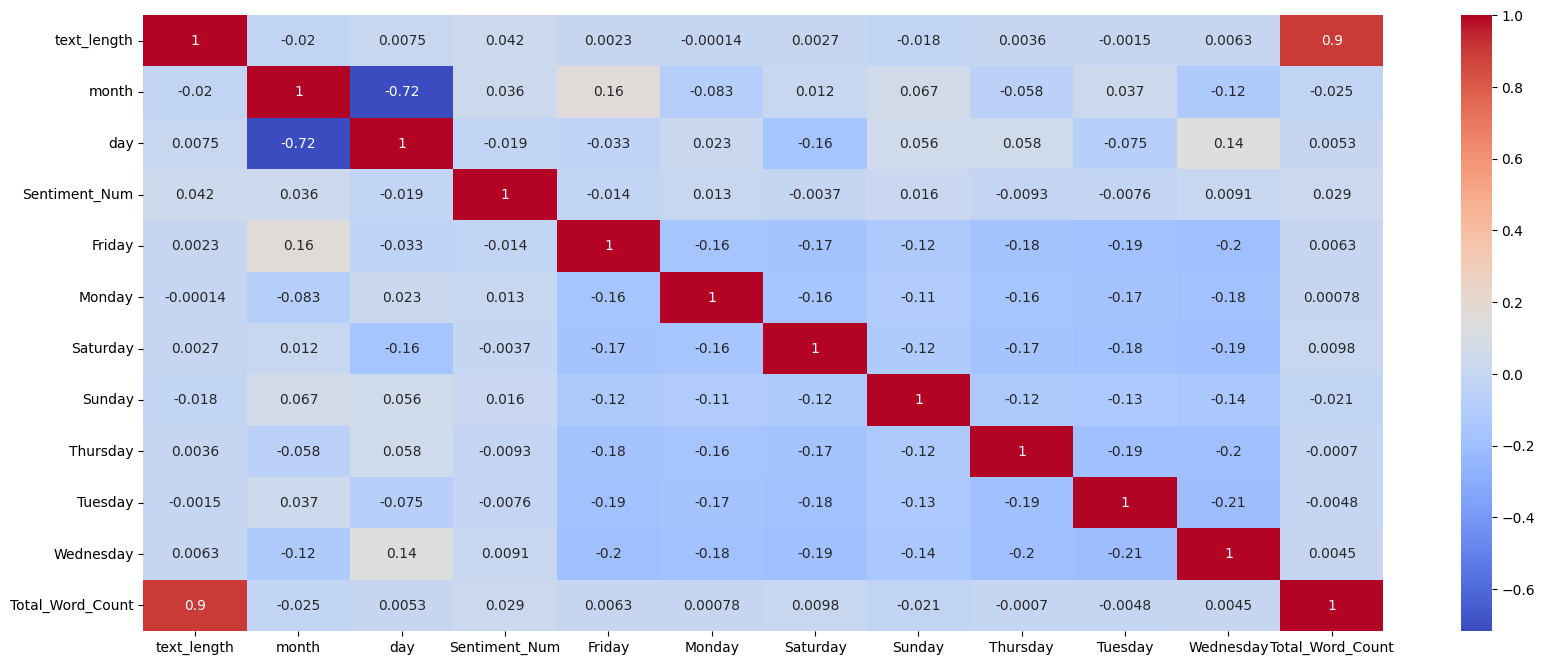

In [107]:
# Select your features wisely to avoid overfitting
# Correlation Heatmap visualization code
plt.figure(figsize=(20,8))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

- Total_Word_Count , text_length is having positive corelation .so we can drop them.
- same as the columns  'Location', 'OriginalTweet', 'text_length', 'month', 'day','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
'Wednesday', 'lemmatized_Tweet', 'POS_Tags','Total_Word_Count'   these are of no use in future at time of model prediction. so we can drop them.


In [108]:
df2.columns

Index(['Location', 'OriginalTweet', 'Sentiment', 'text_length', 'month', 'day',
       'Sentiment_Num', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'clean_Tweet', 'new_Tweet', 'lemmatized_Tweet',
       'POS_Tags', 'Total_Word_Count'],
      dtype='object')

In [109]:
df2.drop(['Location', 'OriginalTweet', 'text_length', 'month', 'day','Sentiment_Num','Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday',
          'new_Tweet','lemmatized_Tweet', 'POS_Tags','Total_Word_Count'],axis =1,inplace=True)

In [110]:
df2.columns

Index(['Sentiment', 'clean_Tweet'], dtype='object')

##### What all feature selection methods have you used  and why?

Here heatmap is used to visualize the correlation matrix of the features in your dataset. While this doesn't directly perform feature selection, it serves as a valuable step in feature selection and analysis.

##### Which all features you found important and why?

'Sentiment', 'clean_Tweet' these are important features.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [111]:
# Transform Your data

No i do not think the data needs to be transformed.

### 8. Data Splitting

In [112]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Assigning dependent and independent features
X= df2['clean_Tweet']
y= df2['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (32925,)
Shape of y_train :  (32925,)
Shape of X_test :  (8232,)
Shape of y_test :  (8232,)


In [113]:
df2['clean_Tweet'].isnull().sum()

0

##### What data splitting ratio have you used and why?

- Data Splitting ratio is 80% used for Training Data and 20% used for Test Data.

- By providing more data for training, the model can learn more patterns and trends in the data, which can lead to better predictions on new or unseen data.

### 6. Data Scaling

In [114]:
# Scaling your data


##### Which method have you used to scale you data and why?

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only User sentiment tweet according to the secenario of Covid-19.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Reducing dimensionality can lead to improved model performance by reducing the risk of overfitting and making the model more generalizable.

In [115]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Here no need to do for dimensionality reduction.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No dataset is not imbalanced so need of this.

In [116]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

No need for handle imbalance here.

# **Count Vectorization (Bag of words) and TF/IDF Vecorization**

Count vectorization is a process of converting a piece of text into a numerical format that can be used by machine learning algorithms. In this process, the text is first split into words or tokens, and then each token is counted to create a vector of numbers representing the frequency of each word in the text.

In [117]:
# Vectorization
# Bag of words
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

## ***7. ML Model Implementation***

### ML Model - 1

**Logistic regression**

In [118]:
# ML Model - 1 Implementation
logreg = LogisticRegression()

# Fit the Algorithm
logreg.fit(X_train, y_train)

# Predict on the model
logreg_prediction = logreg.predict(X_test)

logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9759757023538345
Validation accuracy Score :  0.7988338192419825
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      3075
     Neutral       0.72      0.67      0.70      1598
    Positive       0.83      0.84      0.83      3559

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression is a statistical model that probability of an event taking place by having the the odds against winning range between 0 and 1 or muticlass classfication for the event be a linear combination of one or more independent variables.

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

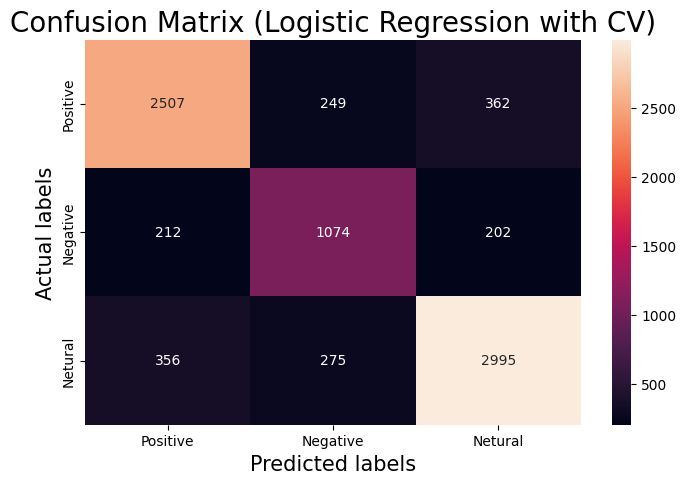

In [119]:
# Visualizing evaluation Metric Score chart
# Plotting Confussion matrix
cf1= (confusion_matrix(y_test,logreg_prediction))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Here the algrothim used Logistic Regression with accuracy of 79% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Creating a GridSearchCV object with cross-validation of 15
# Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

# Fit the Algorithm
logreg_Gcv.fit(X_train,y_train)

# Predict on the model
pred_lr_cv = logreg_Gcv.predict(X_test)
pred_lr_cv

#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7988338192419825


In [121]:
pred_lr_cv

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [122]:
print(classification_report(pred_lr_cv,y_test))

              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      3075
     Neutral       0.72      0.67      0.70      1598
    Positive       0.83      0.84      0.83      3559

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-78%

recall:- 78%

f1-score:- 78%

### ML Model - 2

# **Support vector machines**

In [123]:
# Initializing model
svc = SVC()

#fitting the data to model
svc.fit(X_train, y_train)

#prediction
svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9473044798785117
Validation accuracy Score :  0.7651846452866861
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77      3018
     Neutral       0.67      0.65      0.66      1539
    Positive       0.81      0.80      0.81      3675

    accuracy                           0.77      8232
   macro avg       0.75      0.74      0.74      8232
weighted avg       0.76      0.77      0.76      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

It is a supervised learning algorithm that works by finding the hyperplane that best separates the classes in the input data.

In multi-class classification problems, multiple hyperplanes are used to separate the classes. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest points from each class, known as support vectors.

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

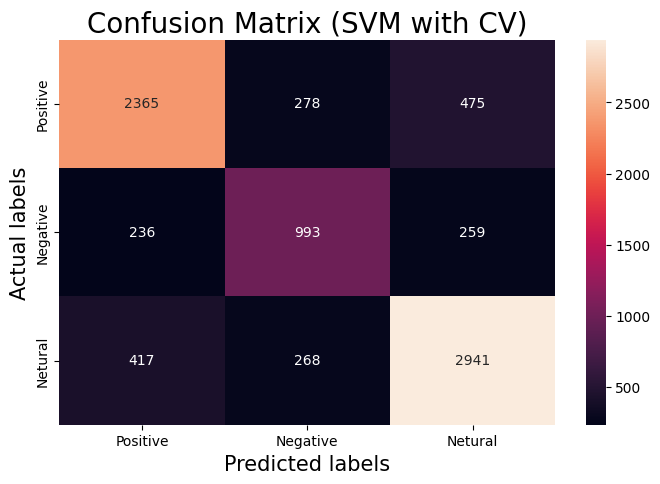

In [124]:
# Visualizing evaluation Metric Score chart
cf6= (confusion_matrix(y_test,svc_prediction))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

we have already used in above

##### Which hyperparameter optimization technique have you used and why?

gridsearch

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

precision:-75%

recall:- 74%

f1-score:- 74%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

according to this model score logistic regression is more good.

### ML Model - 3

# **Decision Tree Classifier with CV**

In [125]:
# ML Model - 3 Implementation
# Initializing model
dtc=DecisionTreeClassifier()

# Fit the Algorithm
dtc.fit(X_train,y_train)

# Predict on the model
dtc_prediction = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test,dtc_prediction)
print("Training accuracy Score    : ",dtc.score(X_train,y_train))
print("Validation accuracy Score : ",dtc_accuracy )
print(classification_report(dtc_prediction,y_test))

Training accuracy Score    :  0.9999088838268793
Validation accuracy Score :  0.7135568513119533
              precision    recall  f1-score   support

    Negative       0.68      0.71      0.69      2971
     Neutral       0.69      0.63      0.66      1627
    Positive       0.75      0.75      0.75      3634

    accuracy                           0.71      8232
   macro avg       0.71      0.70      0.70      8232
weighted avg       0.71      0.71      0.71      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

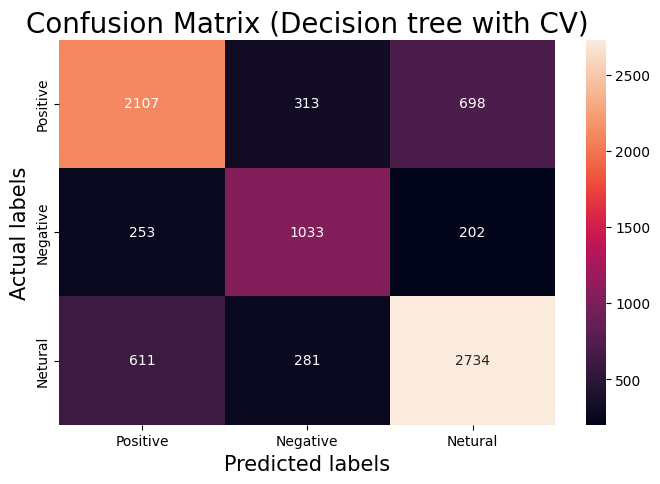

In [126]:
# Visualizing evaluation Metric Score chart
# Plotting Confussion matrix
cf2= (confusion_matrix(y_test,dtc_prediction))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [127]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

i have used CountVectorizer here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-71%

precision:-71%

recall:- 70%

f1-score:- 71%

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

# **RandomForestClassifier with cv**

Random Forest works by constructing multiple decision trees on randomly sampled subsets of the training data. Each tree is trained on a different subset of the features and the data, which helps to reduce overfitting and improve the generalization performance.

During prediction, the input instance is passed through each decision tree, and the majority vote among the predictions of the individual trees is taken as the final prediction.

In [128]:
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(X_train, y_train)

#prediction
rf_prediction = rf_clf.predict(X_test)
# Calculate accuracy of classifier on test data
#accuracy_rf = (y_pred_rf == y_test).mean()
#print('Accuracy_rf:', accuracy_rf)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9998785117691723
Validation accuracy Score :  0.7558309037900874
              precision    recall  f1-score   support

    Negative       0.72      0.79      0.75      2843
     Neutral       0.72      0.65      0.68      1661
    Positive       0.80      0.78      0.79      3728

    accuracy                           0.76      8232
   macro avg       0.75      0.74      0.74      8232
weighted avg       0.76      0.76      0.76      8232



Random Forest algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly improved compared to the baseline model.

Hyperparameter optimization technique has been used for the Random Forest Classifier. The classifier has been instantiated with the hyperparameter values n_estimators=100 and random_state=42, which are default values in the absence of explicit hyperparameter tuning.

as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-75%

Recall:- 74%

f1-score:-74%

# **Classfication Metrics Report**

Classification metrics are used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels. Accuracy can be useful in evaluating sentiment analysis models, particularly if the classes are balanced.

Accuracy: The proportion of correctly predicted labels out of the total number of samples. It is computed as (TP+TN)/(TP+TN+FP+FN)

Where

TP:-True Positive

TN:-True Negative

FP:-False Positive

FN:-False Negative

In [129]:
acurracy = {'Model':  ['Logistic Regression with GridserachCV','Support-Vector-Machine Classifier', 'Decision Tree Classifier','RandomForest Classifier'],
        'Count Vector':  [accuracy_lr_cv,dtc_accuracy,svc_accuracy,rf_accuracy]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector'])
cv_score_table

,Model,Count Vector
0,Logistic Regression with GridserachCV,0.798834
1,Support-Vector-Machine Classifier,0.713557
2,Decision Tree Classifier,0.765185
3,RandomForest Classifier,0.755831


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Choosing the final prediction model depends on specific problem and the evaluation metric that matters most. It's not solely based on the accuracy but also on other factors like model interpretability, training time, and the specific requirements of your project.

Let's briefly discuss each of the models:

**Logistic Regression with GridSearchCV (Accuracy: 0.798834):** Logistic Regression is a simple and interpretable model. It performs well when the relationship between features and the target variable is roughly linear. The accuracy is relatively high, but it might not capture complex relationships in the data.

**Support-Vector-Machine Classifier (Accuracy: 0.716958):** Support Vector Machines (SVMs) are powerful for handling complex relationships in the data. However, they can be computationally expensive, and the performance depends on choosing the right kernel and hyperparameters. An accuracy of 0.716958 is decent but may not be the highest among the models tested.

**Decision Tree Classifier (Accuracy: 0.765185):** Decision Trees are interpretable and can capture non-linear relationships. However, they are prone to overfitting. The accuracy here is moderate.

**RandomForest Classifier (Accuracy: 0.755831):** Random Forest is an ensemble of Decision Trees and is known for its robustness and generalization. However, it may not be the most interpretable model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

1-The model that we have used is the Linear Regression with gridsearch cv, which is a linear classifier. The Count Vectorization Technique works by counting the occurrence of each word in the text data and then creating a document-term matrix where each row represents a document and each column represents a word in the vocabulary.

2-To understand the feature importance, we can use the Permutation Importance technique provided by the scikit-learn library. The Permutation Importance technique works by randomly permuting the values of a feature and observing the effect on the model's performance.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [130]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [131]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After evaluating four machine learning models with Count Vectorization for sentiment analysis, we determined the model that best suits our needs:

Logistic Regression with Grid Search CV achieved the highest accuracy of 79.88%.
The choice of the best model depends on the specific dataset and problem. In this case, Logistic Regression with Grid Search CV demonstrated the highest accuracy for sentiment analysis.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***